# Lending Club Case Study - Exploratory Data Analysis

##### Group Members: 
1. Rohit Balekundri
2. Dr Heeba Altaf Gurku

### IMPORT LIBRARIES

In [82]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='white')
#sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
#import plotly
from scipy import stats
import os
from scipy.stats import chi2_contingency

# set it to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

# Data sourcing and Understanding


In [83]:
#reading the loan csv file
df = pd.read_csv('loan\loan.csv',encoding = "ISO-8859-1", low_memory=False)

In [84]:
#display maximum columns
pd.set_option('display.max.columns',None)

In [85]:
#check the dataset
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [86]:
#Check the shape of the dataframe
L=len(df)
df.shape

(39717, 111)

In [87]:
#checking the column names
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [88]:
#check the data types
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [89]:
# checking the value_counts() for all columns to understand the type of data in columns
pd.set_option('display.max.rows',30)
for i in df.columns:
    print(i)
    print((df[i].value_counts().to_frame()), '\n')

id
         id
1052670   1
685540    1
253425    1
730606    1
867821    1
...      ..
807743    1
1006398   1
1000253   1
871228    1
380631    1

[39717 rows x 1 columns] 

member_id
         member_id
745584           1
900541           1
634745           1
943558           1
896958           1
...            ...
875198           1
803517           1
1264316          1
942777           1
1251331          1

[39717 rows x 1 columns] 

loan_amnt
       loan_amnt
10000       2833
12000       2334
5000        2051
6000        1908
15000       1895
...          ...
12525          1
16675          1
6175           1
22300          1
28750          1

[885 rows x 1 columns] 

funded_amnt
       funded_amnt
10000         2741
12000         2244
5000          2040
6000          1898
15000         1784
...            ...
25675            1
1475             1
30400            1
24275            1
28750            1

[1041 rows x 1 columns] 

funded_amnt_inv
          funded_amnt_inv
5000.00   

Empty DataFrame
Columns: [inq_last_12m]
Index: [] 

acc_open_past_24mths
Empty DataFrame
Columns: [acc_open_past_24mths]
Index: [] 

avg_cur_bal
Empty DataFrame
Columns: [avg_cur_bal]
Index: [] 

bc_open_to_buy
Empty DataFrame
Columns: [bc_open_to_buy]
Index: [] 

bc_util
Empty DataFrame
Columns: [bc_util]
Index: [] 

chargeoff_within_12_mths
      chargeoff_within_12_mths
0.00                     39661 

delinq_amnt
   delinq_amnt
0        39717 

mo_sin_old_il_acct
Empty DataFrame
Columns: [mo_sin_old_il_acct]
Index: [] 

mo_sin_old_rev_tl_op
Empty DataFrame
Columns: [mo_sin_old_rev_tl_op]
Index: [] 

mo_sin_rcnt_rev_tl_op
Empty DataFrame
Columns: [mo_sin_rcnt_rev_tl_op]
Index: [] 

mo_sin_rcnt_tl
Empty DataFrame
Columns: [mo_sin_rcnt_tl]
Index: [] 

mort_acc
Empty DataFrame
Columns: [mort_acc]
Index: [] 

mths_since_recent_bc
Empty DataFrame
Columns: [mths_since_recent_bc]
Index: [] 

mths_since_recent_bc_dlq
Empty DataFrame
Columns: [mths_since_recent_bc_dlq]
Index: [] 

mths_since

# Data Cleaning

In [90]:
#percentage of null values in columns
null_per=round(100*((df.isnull().sum())/len(df)),2)
null_per

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64

In [91]:
# finding out the number of colums with all values missing(100%)
null_per[null_per==100.0].count()

54

We found that about 54 columns has 100% missing values , 2 had more than 90% and 2 more had more than 30% missing values. We decided to remove all the columns with more than 30% of missing values as replacing them with mean or mode would significantly affect the analysis and introduce bias and removing rows for columns with more than 30% values missing would lead to significant loss of observations.

<AxesSubplot:>

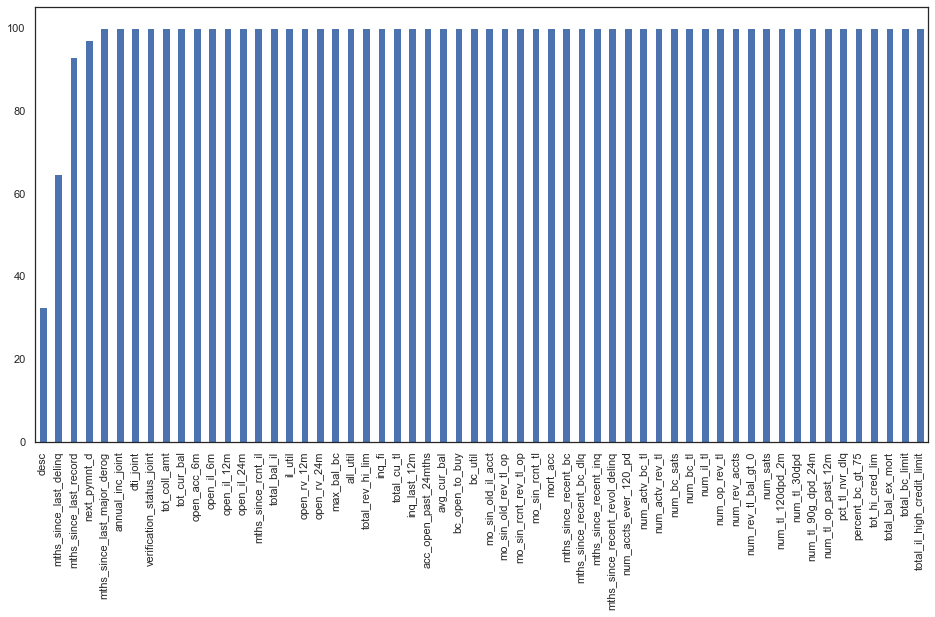

In [92]:
#finding out the columns with more than 30% of missing values
bf=null_per[null_per>30]
fig=plt.subplots(figsize=(16,8))
bf.plot(kind='bar')

In [93]:
#Removing columns which has more than 30% null values in it.
df.drop(null_per[ null_per > 30 ].index, axis=1, inplace=True)

In [94]:
df.shape

(39717, 53)

In [95]:
#check further null values 
missing_value = round(100*(df.isnull().sum()/len(df.index)), 2)
missing_value[missing_value != 0]

emp_title                    6.19
emp_length                   2.71
title                        0.03
revol_util                   0.13
last_pymnt_d                 0.18
last_credit_pull_d           0.01
collections_12_mths_ex_med   0.14
chargeoff_within_12_mths     0.14
pub_rec_bankruptcies         1.75
tax_liens                    0.10
dtype: float64

### Further shortlist and narrow down the columns for analysis

In [96]:
#Lets check the unique entries per column
df.nunique().sort_values()

tax_liens                       1
delinq_amnt                     1
chargeoff_within_12_mths        1
acc_now_delinq                  1
application_type                1
                            ...  
total_pymnt_inv             37518
total_pymnt                 37850
url                         39717
member_id                   39717
id                          39717
Length: 53, dtype: int64

#### 3. DROPPING COLUMNS WITH SAME VALUE FOR ALL THE ROWS (ONLY 1 UNIQUE VALUE).

In [97]:
#finding the columns with only 1 unique value i.e same for all values for all rows.
print(df.nunique()[df.nunique()==1])
d=df.drop(df.nunique()[df.nunique()==1].index,axis=1,inplace=True)

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64


### The columns below does not make much difference in the analysis so we can drop
#### Variables representing certain  consumer behaviour  and  loan charateristics seems to be post loan approval parameters so we are not considering these variables and hence droping them from analysis.Also variables which do not provide relevant information for the analysis like id, member id etc will also be removed. Below are the columns which are removed 

| Column name               | Removed                                                                                       |
|:--------------------------|----------------------------------------------------------------------------------------------:|
| 'id'                      | not required                                                                                  |
| 'member id                | not required                                                                                  | 
| 'url                      | not required                                                                                  |
| 'zip_code                 | incomplete zip code(xx)-not useful for analysis                                               |
| 'emp_title                | not-useful too many distinct values for different company names                               |
| 'title                    | not-useful too may distinct values                                                            |
| 'total_pymnt'             | post loan approval parameter                                                                  |
| 'total_pymnt_inv',        | post loan approval parameter                                                                  |   
| 'total_rec_prncp',        | post loan approval parameter                                                                  |
| 'total_rec_int',          | post loan approval parameter                                                                  | 
| 'total_rec_late_fee       | post loan approval parameter                                                                  |
| 'last_pymnt_d',           | post loan approval parameter                                                                  |
| 'last_pymnt_amnt',        | post loan approval parameter                                                                  |
| 'recoveries'              | post loan approval parameter                                                                  |
| 'collection_recovery_fee' | post loan approval parameter                                                                  |
| 'delinq_2yrs'             | post loan approval parameter                                                                  |
| 'funded_amnt'             | post loan approval parameter(funding of loan occurs after loan approval                       |
| 'funded_amnt_inv'         | post loan approval parameter(funding of loan occurs after loan approval                       |
| 'last_credit_pull_d'      | last_credit_pull dates are all post approval date- which makes it a post approval parameter   |
| 'inq_last_6mths'          | not relevant                                                                                  |
| 'out_prncp','out_prncp'   | post_loan parameter                                                                           |
| 'open_acc',               | customer behavior variable                                                                    |
| 'revol_bal','revol_util'  | customer behavior variable                                                                    |
|'earliest_cr_line',        | customer behavior variable                                                                    |
|'total_acc                 | customer behavior variable                                                                    |  
|                           |                                                                                               |



the above columns seems to have no use so we can drop them.

Droppping customer behavioural variables since behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval!


Note: Create a common list so we can just add our column to remove

In [98]:
#Drop the irrelavant columns to analysis
col_to_be_dropped = ['zip_code', 'url','member_id','id','funded_amnt','funded_amnt_inv','earliest_cr_line','total_acc',
                'emp_title', 'title','inq_last_6mths', 'open_acc','revol_bal','revol_util',
                 'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
                'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d',
                'delinq_2yrs']
df = df.drop(col_to_be_dropped,axis=1)

In [99]:
#lets check the shape post column deletion
df.shape

(39717, 17)

In [100]:
#Lets check the missing values in the dataframe after dropping unnecessary columns
missing =round(100*(df.isnull().sum()/len(df.index)), 2) 
missing[missing != 0]

emp_length             2.71
pub_rec_bankruptcies   1.75
dtype: float64

In [101]:
#lets drop null values from emp_length
df = df[~df.emp_length.isnull()] 
df = df[~df.pub_rec_bankruptcies.isnull()]

In [102]:
#lets check the shape post row deletion
df.shape

(37945, 17)

Now we have cleaned data with 37945 rows and 19 columns for analysis

Next, columns issue_d and which denote date or month information but are of the type object in the dataframe. Let's change the dtype of the column to datetime. Doing so will help in further using these column values to its best for analysis.

In [103]:
#Change the object to datetime 
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')


In [104]:
#lets analyse the dataframe dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37945 entries, 0 to 39680
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             37945 non-null  int64         
 1   term                  37945 non-null  object        
 2   int_rate              37945 non-null  object        
 3   installment           37945 non-null  float64       
 4   grade                 37945 non-null  object        
 5   sub_grade             37945 non-null  object        
 6   emp_length            37945 non-null  object        
 7   home_ownership        37945 non-null  object        
 8   annual_inc            37945 non-null  float64       
 9   verification_status   37945 non-null  object        
 10  issue_d               37945 non-null  datetime64[ns]
 11  loan_status           37945 non-null  object        
 12  purpose               37945 non-null  object        
 13  addr_state      

Next, there are few columns expressing % like int_rate.
These has values like '15.27%' and '9.40%'.
Further these columns has dtype as 'object'. Let's convert these columns to have just the value withoout '%' and typecast it to float.

In [105]:
#Lets analyse interest rate column
df.int_rate.describe()

count      37945
unique       337
top       10.99%
freq         932
Name: int_rate, dtype: object

In [106]:
#Lets remove % sign 
df['int_rate'] = df['int_rate'].str.strip('%').astype('float')

In [107]:
#check Interest Rate column post stripping of % sign
df[['int_rate']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37945 entries, 0 to 39680
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   int_rate  37945 non-null  float64
dtypes: float64(1)
memory usage: 592.9 KB


Let us now take a look at the emp_length column.

In [108]:
#Lets analyse Employee Length column
df.emp_length.value_counts()

10+ years    8760
< 1 year     4416
2 years      4304
3 years      4034
4 years      3391
5 years      3249
1 year       3148
6 years      2197
7 years      1751
8 years      1454
9 years      1241
Name: emp_length, dtype: int64

According to the data_dictionary file description for this field,
emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

Let's convert the column to have values between 0 and 10.

In [109]:
#lets take values into one dictionary 
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [110]:
#replace years with number
df = df.replace({"emp_length": emp_length_dict })

In [111]:
#Lets verify
df.emp_length.value_counts()

10    8760
0     4416
2     4304
3     4034
4     3391
5     3249
1     3148
6     2197
7     1751
8     1454
9     1241
Name: emp_length, dtype: int64

The column term: The number of payments on the loan. Values are in months and can be either 36 or 60.
removing the months string from within the column term.

In [112]:
#Lets analyse Term column
df.term.value_counts()

 36 months    27590
 60 months    10355
Name: term, dtype: int64

In [113]:
#remove keyword 'months' after 36 and 60
df['term'] = df.term.apply(lambda x: x.split()[0])
df.term.value_counts()

36    27590
60    10355
Name: term, dtype: int64

### Derived variables

issue_d: The month which the loan was funded .Lets split the available date into month and year column.

In [114]:
#create a new variable with the existing variable for the analysis of month and year 
df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_year'] = df['issue_d'].dt.year

In [115]:
# categorise intrest rates into buckets which will help in analysis
df['int_rate_range'] = pd.cut(df['int_rate'], [0, 10, 12, 16, 20, 22], labels=['0-10', '10-12', '12-16', '16-20','20+'])

In [116]:
# Categorise the loan_amount into bucket which will help in analysis
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

In [117]:
# categorise dti into buckets 
df['dti_range'] = pd.cut(df['dti'], [-np.inf, 5.00, 10.00, 15.00, 20.00,25.00, np.inf], labels=['0.00-5.00', '5.00-10.00', '10.00-15.00', '15.00-20.00','20.00-25.00', '25.00+'])

In [118]:
#check the shape after adding derived variables
df.shape

(37945, 22)

In [119]:
#Lets analyse Loan status column
df.loan_status.value_counts()

Fully Paid     31566
Charged Off     5281
Current         1098
Name: loan_status, dtype: int64

As our target variable is loan_status and our objective is find predictors for charged off,for analysis we only need 'fully paid' and 'charged off' loan status. 'Current' loan status will not provide any useful information.Thus deleting rows with 'Current' loan status

In [120]:
#dropping the rows where loan staus
df=df.loc[~(df['loan_status']=='Current'),:]

In [121]:
#lets check the shape 
df.shape

(36847, 22)

### Removing outliers

In [122]:
#by looking at below it seems the annual_inc has some outlier after 75%
print(df["annual_inc"].describe())
#lets check further where we have the outliers
print(df["annual_inc"].describe(percentiles=[.25, .50, .75, .80 , .90, .95, .99 , 1]))


count     36847.00
mean      69404.48
std       64027.47
min        4000.00
25%       41004.00
50%       60000.00
75%       83000.00
max     6000000.00
Name: annual_inc, dtype: float64
count     36847.00
mean      69404.48
std       64027.47
min        4000.00
25%       41004.00
50%       60000.00
75%       83000.00
80%       90000.00
90%      116685.60
95%      141998.80
99%      235000.00
100%    6000000.00
max     6000000.00
Name: annual_inc, dtype: float64


we can clearly see the outlier lier after 99% so lets remove 

In [123]:
#removing outlier
df = df[df["annual_inc"] < df["annual_inc"].quantile(0.99)]

In [124]:
# categorise annual_inc into buckets 
df['annual_inc_range'] = pd.cut(df['annual_inc'],[0, 25000,50000, 75000, 100000,500000], labels= ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above'])

In [125]:
#lets verify the bucket
df['annual_inc_range'].value_counts()

25000-50000         12162
50000-75000         11270
75000-100000         5881
100000 and above     4965
0-25000              2199
Name: annual_inc_range, dtype: int64

## FINAL DATASET

In [126]:
#Lets check the shape of the final dataset
df.shape

(36477, 23)

In [127]:
#Percentage the date (observations in the final dataset)
print('{} % of observations are in the final dataset after data cleaning'.format(len(df)/L*100))

91.84228416043509 % of observations are in the final dataset after data cleaning


In [128]:
#Lets analyse the data
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies,issue_d_month,issue_d_year,int_rate_range,loan_amnt_range,dti_range,annual_inc_range
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,0.00,12,2011,10-12,0-7000,25.00+,0-25000
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,0.00,12,2011,12-16,0-7000,0.00-5.00,25000-50000
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,0.00,12,2011,12-16,0-7000,5.00-10.00,0-25000
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,0.00,12,2011,12-16,7000-14000,15.00-20.00,25000-50000
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,0.00,12,2011,0-10,0-7000,10.00-15.00,25000-50000


   |        INDEPENDANT VARIABLES|                                      |              DEPENDANT/TARGET VARIABLE              |
   |:---------------------------:|:------------------------------------:|:---------------------------------------------------:|
   |CATEGORICAL VARIABLES        |      QUANTITATIVE VARIABLES          |          'loan_status'                              |
   |'term'                       |'loan_amnt'                           |                                                     |
   |'grade'                      |'int_rate'                            |                                                     |
   |'sub_grade'                  |'installment'                         |                                                     |
   |'verification_status'        |'annual_inc'                          |                                                     |
   |'purpose','dti_range         |'dti                                  |                                                     |
   |'issue_month',issue_year     |                                      |                                                     |
   |'emp_length',                |                                      |                                                     |
   |'addr_state'                 |                                      |                                                     |
   |'annual_inc_range',pub_rec'  |                                      |                                                     | 
   |'pub_rec_bankruptcies',      |                                      |                                                     |
   |'int_rate_range'             |                                      |                                                     | 
   |'loan_amnt_range'            |                                      |                                                     | 
   | 'home_ownership'            |                                      |                                                     | 
 
   

In [129]:
#lets take all the categorical variable into one variable
Categorical_variables=['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','loan_status','addr_state','pub_rec','pub_rec_bankruptcies','loan_amnt_range',
 'annual_inc_range','int_rate_range','issue_d_month','issue_d_year','issue_d','dti_range']

In [130]:
#lets do the same for continous variables
Continous_variables=[]
for i in df.columns:
    if i not in Categorical_variables:
        Continous_variables.append(i)
Continous_variables    

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']

# EDA Analysis 
## Univariate and Segmented Univariate Analysis

## Univariate analysis on Quantitative Variables

In [131]:
# function for Univariate Analysis on Quantitative Variables- box plot ,distribution plot
def Univariate_conti(col1):
    plt.figure(figsize=(15,8),facecolor='lavender')
    # subplot 1
    
    plt.subplot(2, 2, 1)
    ax = sns.distplot(df[col1],rug = True)
    ax.set_title(col1 + " Distribution Plot",fontsize=16)
    ax.set_xlabel(col1,fontsize=14)
    # subplot 2
    plt.subplot(2, 2, 2)
    ax = sns.boxplot(y=df[col1])
    ax.set_title(col1 + ' Box Plot',fontsize=16)
    ax.set_ylabel(col1,fontsize=14)
    plt.show()
    print("OBSERVATION- above plots show that most of the borrower's {} are in the range of {}-{}".format(col1,np.quantile(df[col1],0.25),np.quantile(df[col1],0.75)))
def seg_boxplt(col1,col2):
    fig,ax=plt.subplots(figsize=(14,4),facecolor='lavender')
    cf = sns.boxplot(x=col2, y=col1, data=df)
    cf.set_xticklabels(cf.get_xticklabels(),rotation=45)
    cf.set_xlabel(col2 , fontsize=15)
    cf.set_ylabel(col1, fontsize=15)
    cf.set_title(col1 + "  vs  " + col2, fontsize=20) 
    return(df.groupby(col2)[col1].describe())/
'""'

### loan_amont

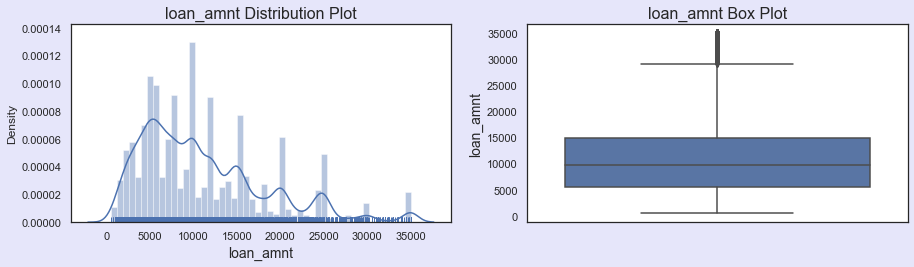

OBSERVATION- above plots show that most of the borrower's loan_amnt are in the range of 5500.0-15000.0


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5241.00,12171.96,8058.10,1000.00,6000.00,10000.00,16750.00,35000.00
Fully Paid,31236.00,10866.26,7130.83,500.00,5400.00,9600.00,15000.00,35000.00


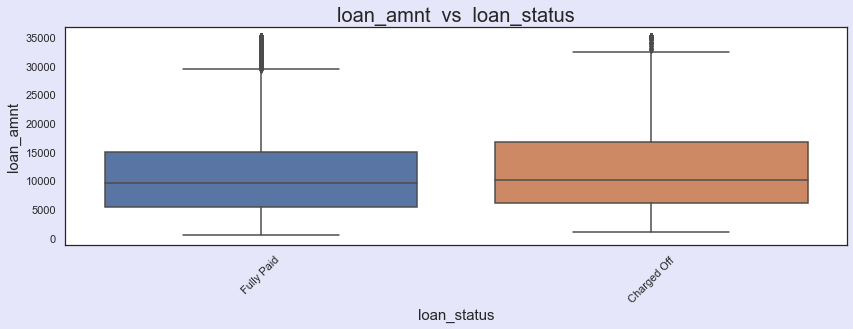

In [132]:
#Univariate and Segmented univariate analysis for loan amount & loan status
Univariate_conti('loan_amnt')
seg_boxplt('loan_amnt','loan_status')

### Observations :
###### Above plots show that most of the Loan amounts are in range of 5000 - 15000

### annual_inc

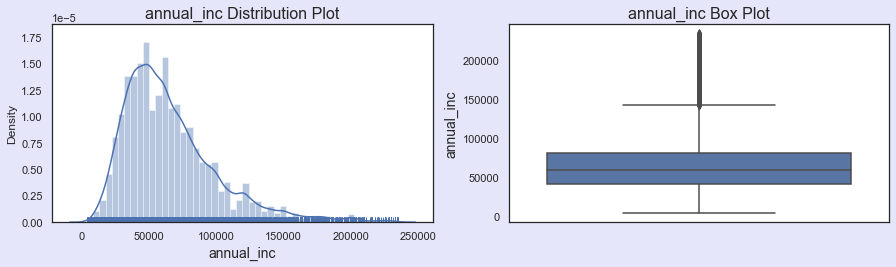

OBSERVATION- above plots show that most of the borrower's annual_inc are in the range of 41000.0-81960.0


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5241.00,60621.24,32838.53,4080.00,38000.00,54000.00,75000.00,230000.00
Fully Paid,31236.00,66860.88,35395.50,4000.00,42000.00,60000.00,83200.00,234996.00


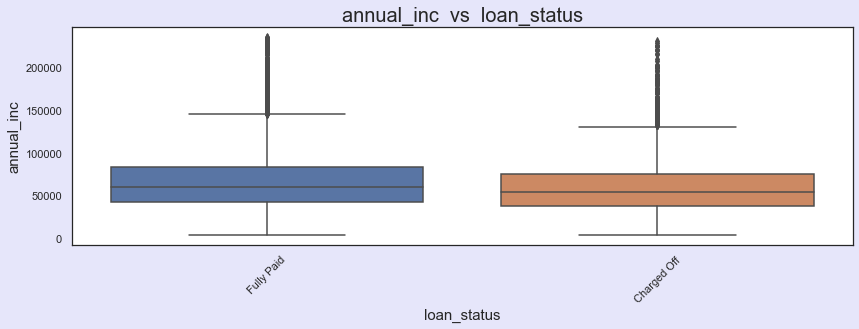

In [133]:
# Univariate Analysis on annual_inc-Quantitative Variables
Univariate_conti('annual_inc')
#Univariate segmental analysis annual vs loan_status
seg_boxplt('annual_inc','loan_status')

#### Observations :
#### above plots show that most of the borrower's Annual incomes are in range of 40000- 100000

### int_rate

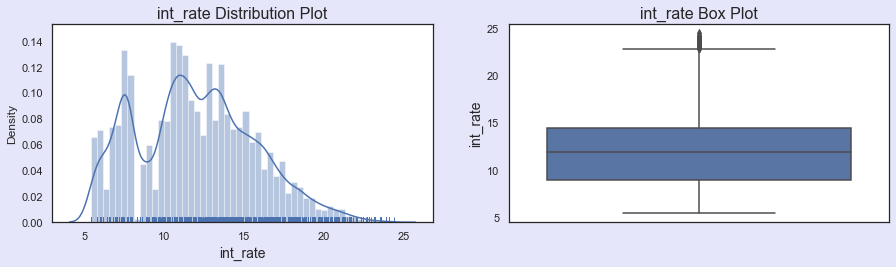

OBSERVATION- above plots show that most of the borrower's int_rate are in the range of 8.94-14.46


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5241.00,13.92,3.65,5.42,11.49,13.79,16.45,24.40
Fully Paid,31236.00,11.65,3.60,5.42,8.59,11.49,13.99,24.11


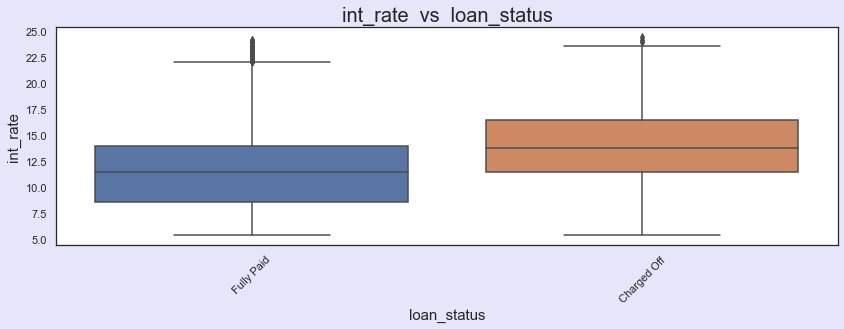

In [134]:
##Univariate and Segmented univariate analysis for on int_rate
Univariate_conti('int_rate')
seg_boxplt('int_rate','loan_status')

### Observations:
- #### From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between 9% to 16%. Some people took loan at higher rates of interest i.e., 22.5% or more has high risk at the initial look, lets analyze further to validate this

In [135]:
#Univariate and Segmented univariate analysis on Loan status and Interest rate
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5241.00,13.92,3.65,5.42,11.49,13.79,16.45,24.40
Fully Paid,31236.00,11.65,3.60,5.42,8.59,11.49,13.99,24.11


- #### Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate of 11.7%.
- #### The intrest rate for Charged Off loans appear to be higher than for Fully paid. As, the risk increases the rate of interest imposed on the loan also increases.Let us validate this on further analysis


## installment

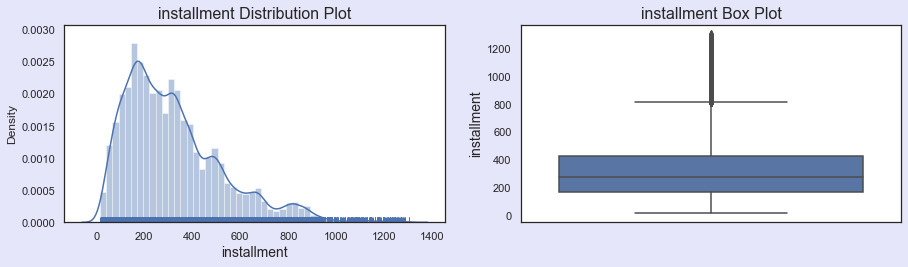

OBSERVATION- above plots show that most of the borrower's installment are in the range of 167.09-424.8


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5241.00,336.32,214.35,22.79,171.22,294.65,456.99,1305.19
Fully Paid,31236.00,319.68,204.60,16.08,166.05,276.23,419.82,1288.10


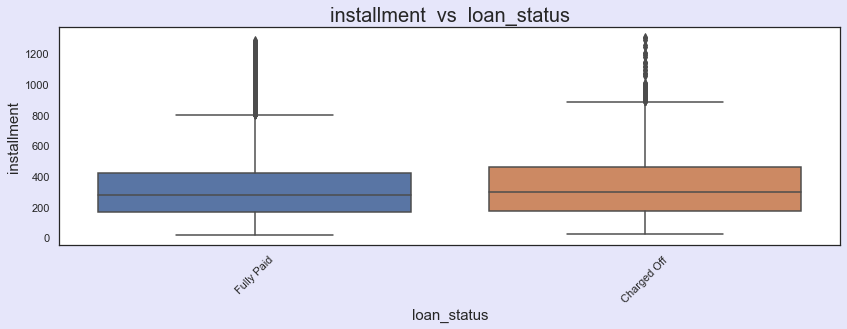

In [136]:
#Univariate analysis on installment
Univariate_conti('installment')
seg_boxplt('installment','loan_status')

### Observations
#### The Most representative value of Installment amount in around 278.

## dti

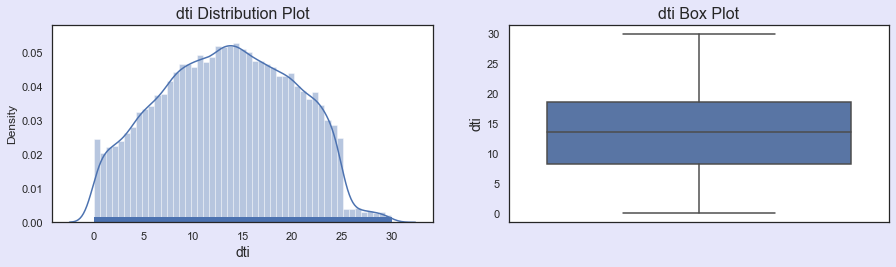

OBSERVATION- above plots show that most of the borrower's dti are in the range of 8.3-18.63


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5241.00,14.06,6.55,0.00,9.17,14.36,19.29,29.85
Fully Paid,31236.00,13.28,6.65,0.00,8.16,13.34,18.51,29.99


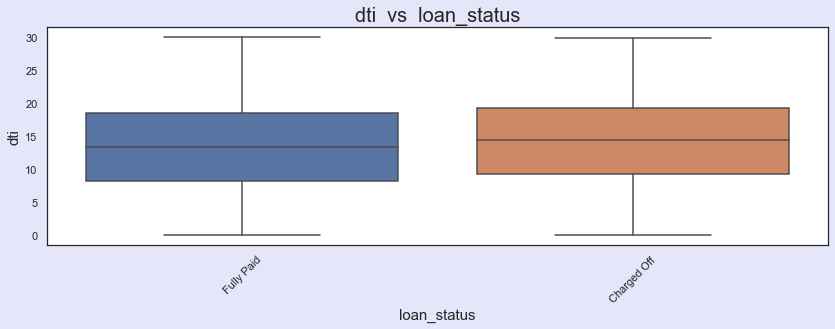

In [137]:
#Univariate and Segmented univariate analysis for debt to income and loan status
Univariate_conti('dti')
seg_boxplt('dti','loan_status')

### Observations:
#### distribution is very much similar to normal distribution. This is good sign that all the loans are given to borrower's who have Debt to Income ratio less than 30.

---

## Univariate and segmented Analysis on categorical variable

In [138]:
#def Univariate analysis function 
def univariate_analy(col):
    dims = (6,6)
    rot_flag = 0
    plt.figure(figsize=(16,8),facecolor='oldlace')
    # sns.set_style("dark")
    ax = sns.countplot(x=col, data=df,hue=None,palette='flare')
    plt.title(col,fontsize=16)
    plt.xlabel(col,fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    ncount = len(df)

    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]',fontsize=14)

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
        ha='center', va='bottom') # set the alignment of the text

###  Target variable- loan_status

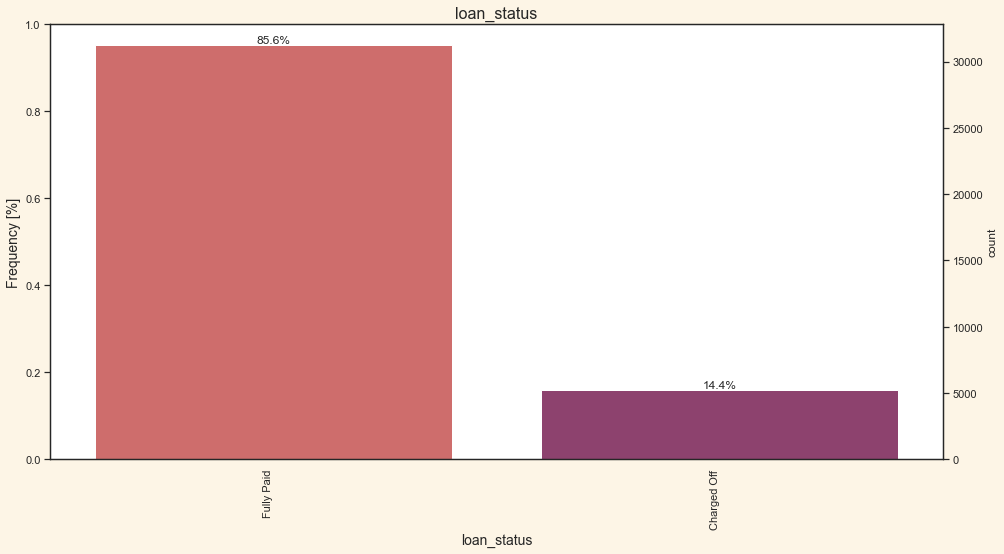

In [139]:
# univariate analysis of target variable(loanstatus)
univariate_analy('loan_status')

### Observations: 
#### above plot shows that close to 14.4% loans were charged off out of total loan issued.
#### Fully paid has higher range.

### UNIVARIATE ANALYSIS OF INPUT CATEGORICAL VARIABLES

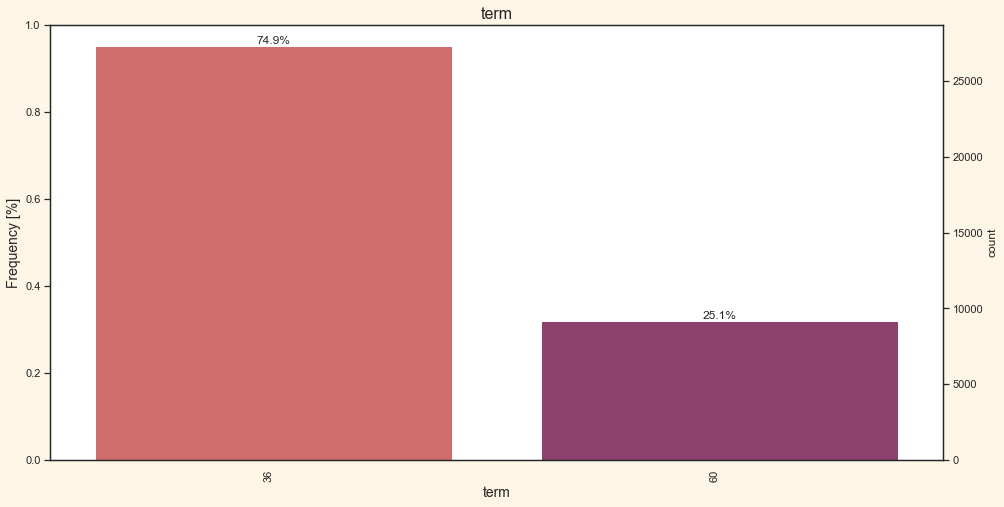

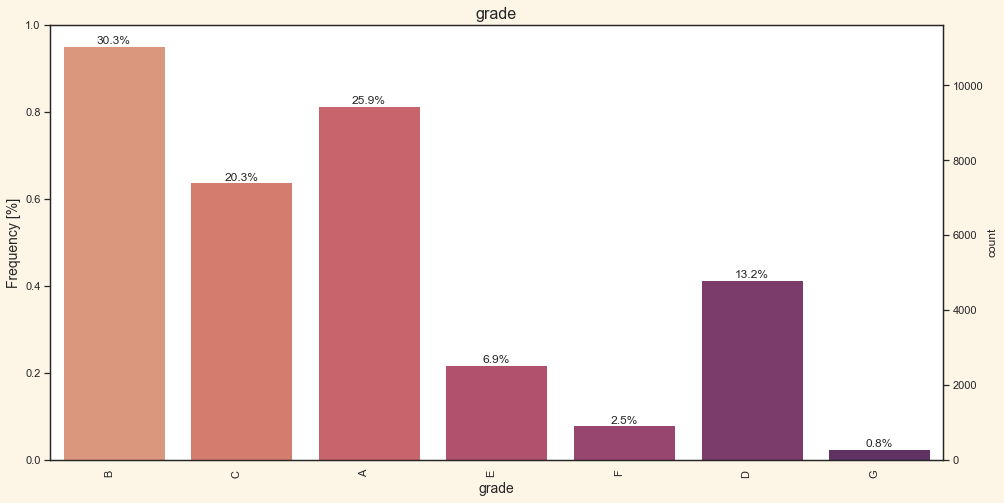

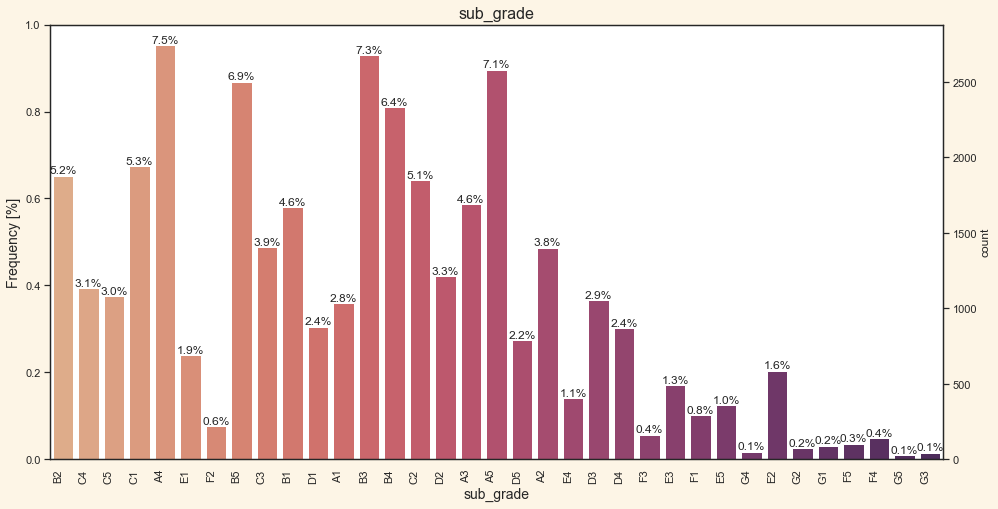

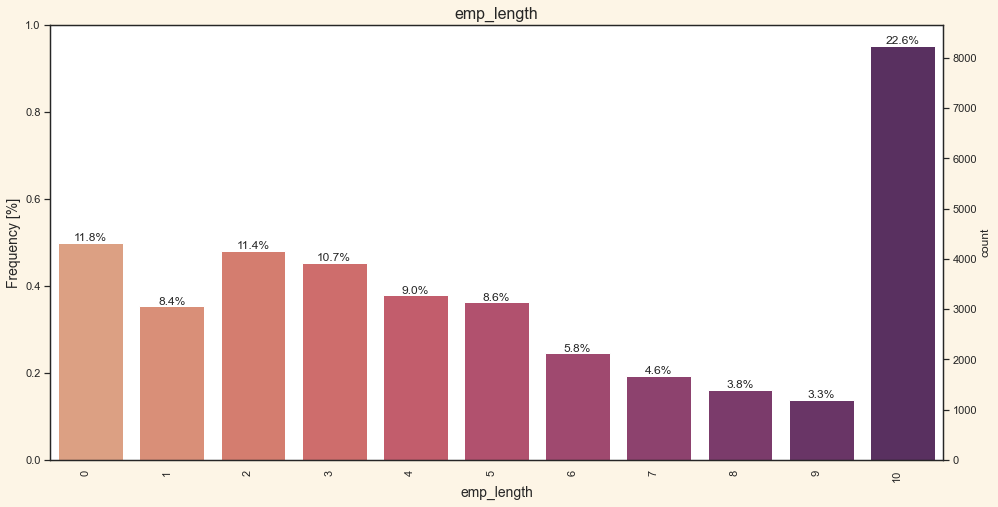

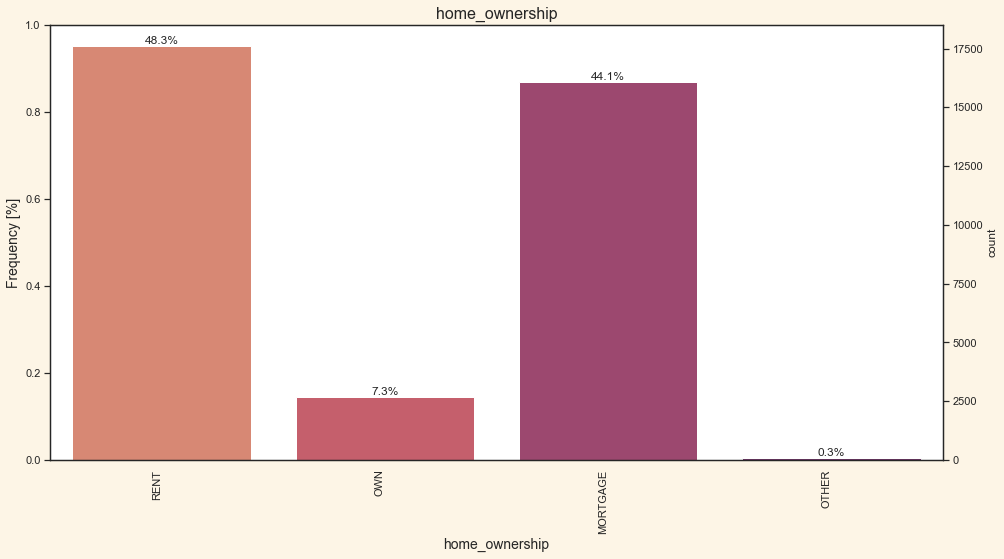

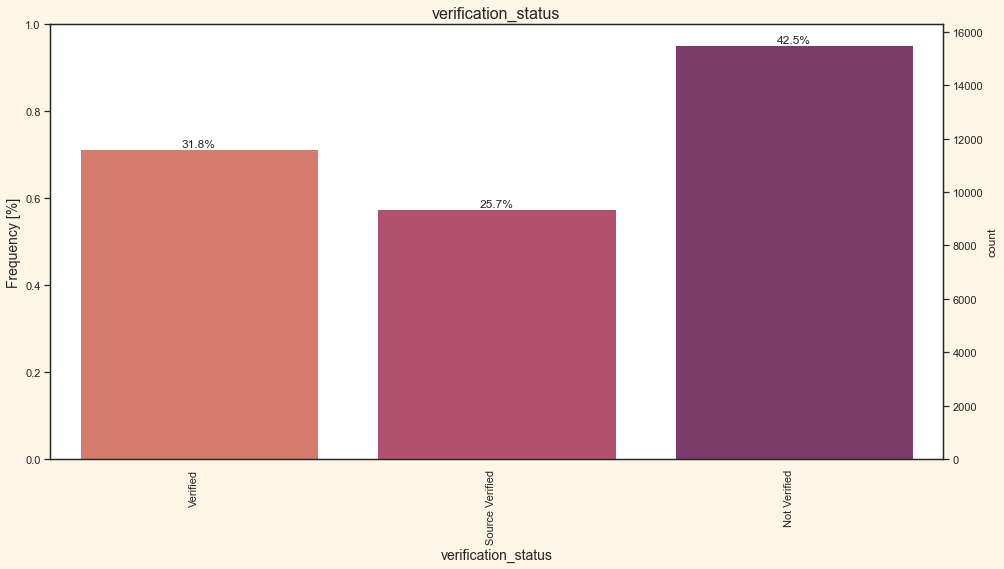

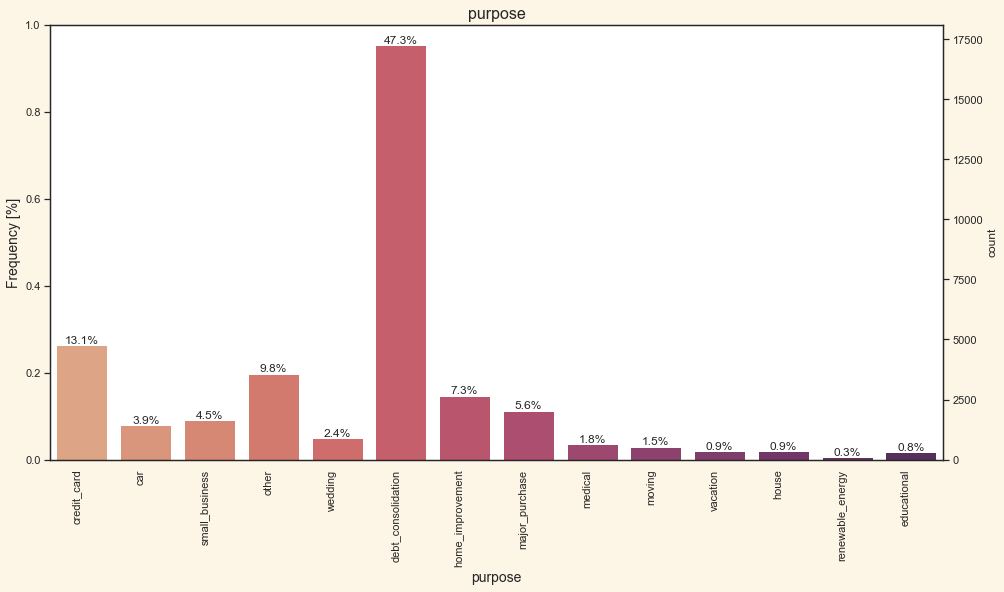

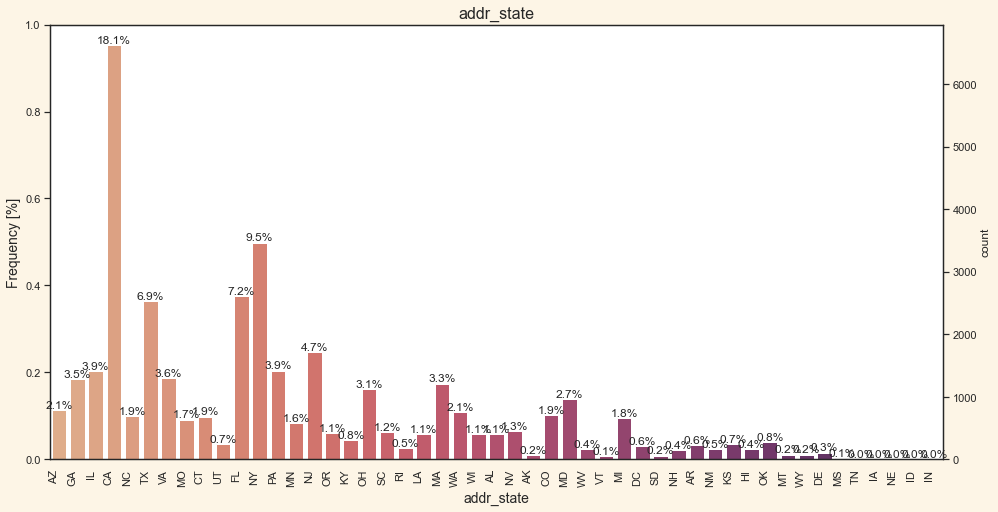

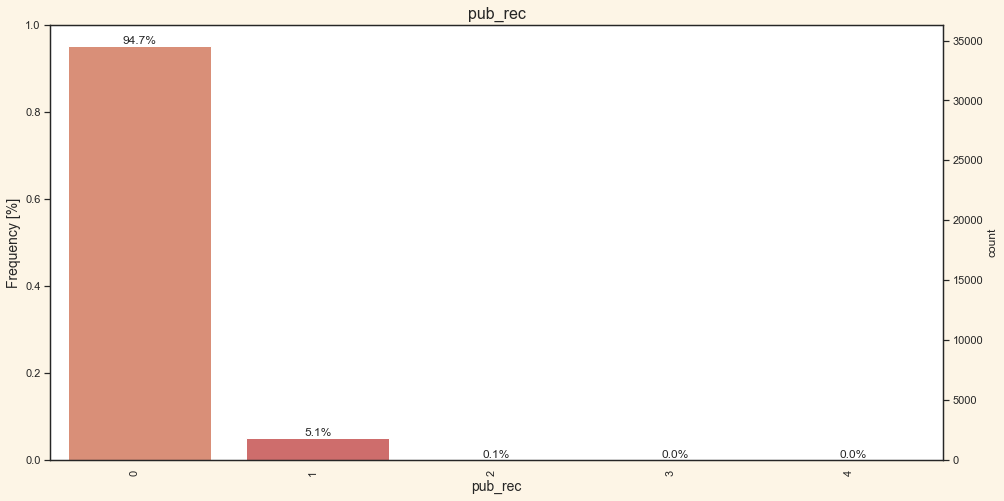

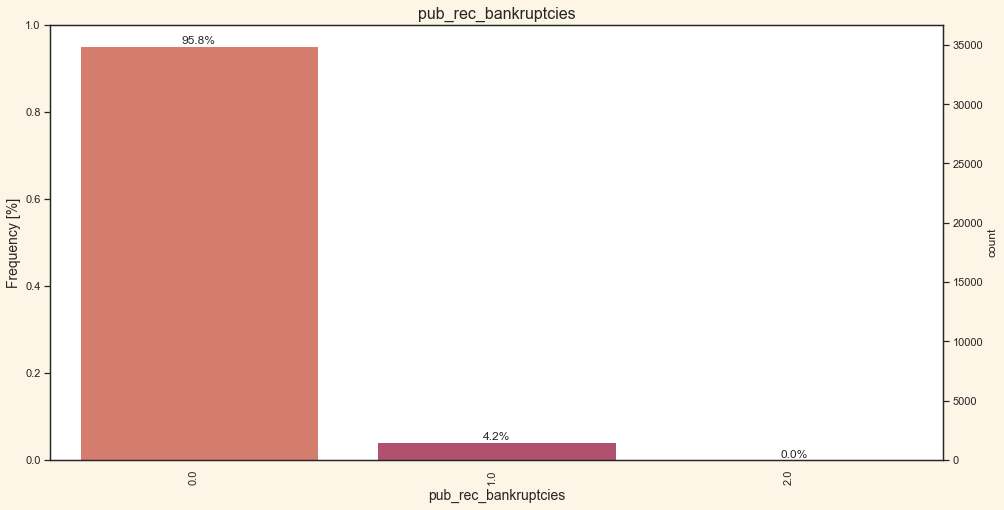

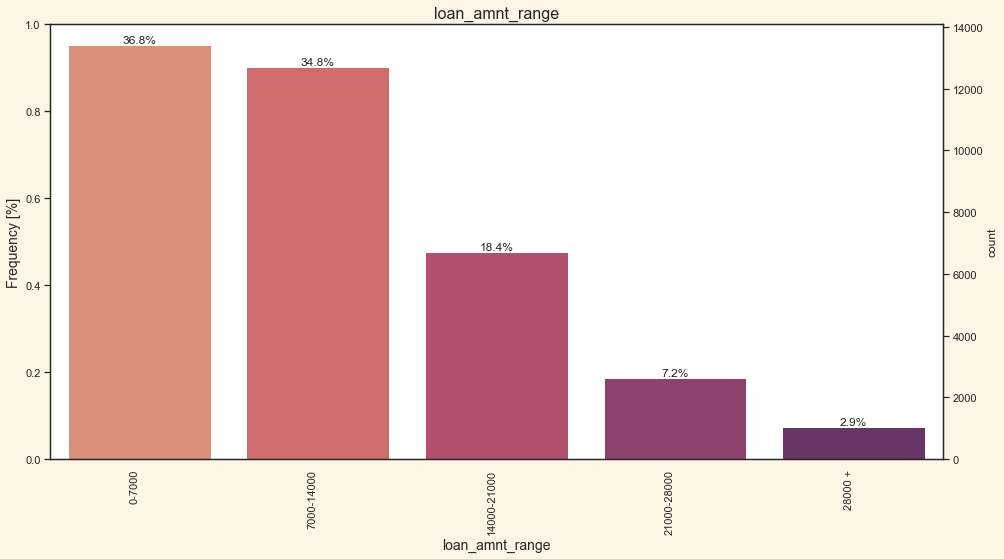

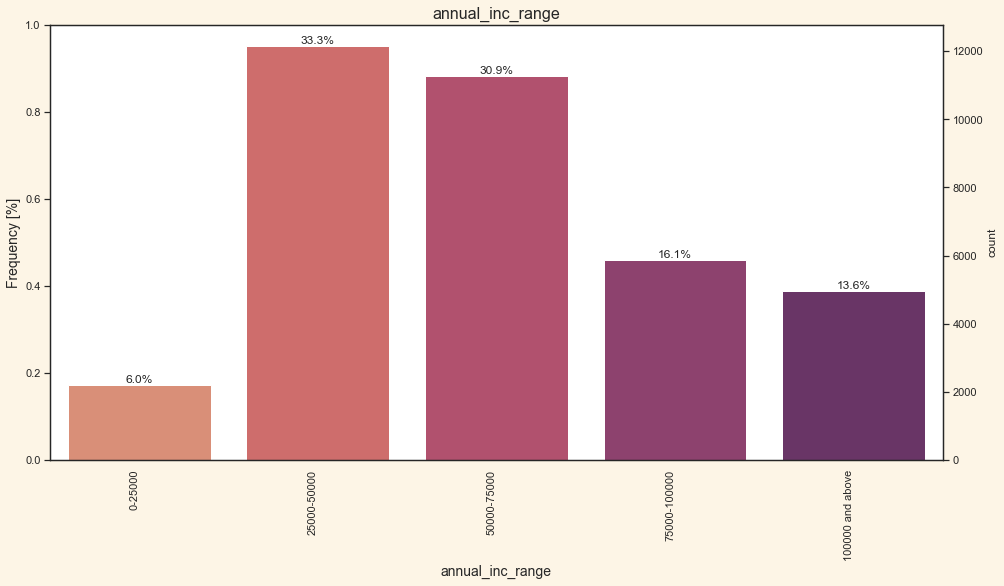

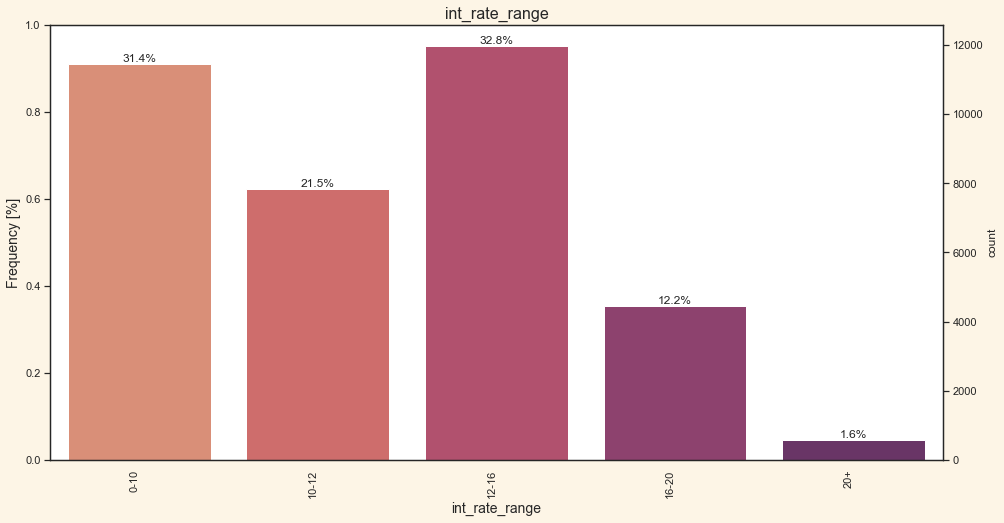

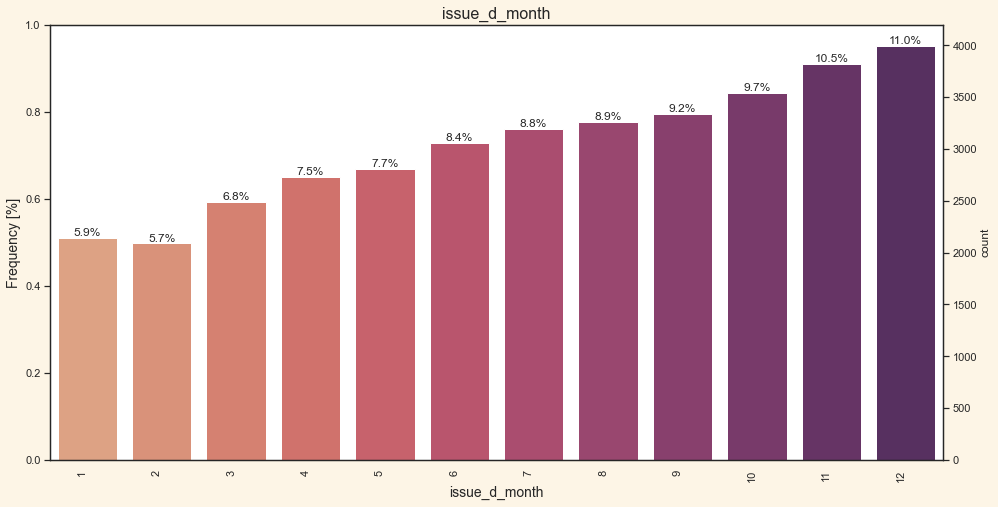

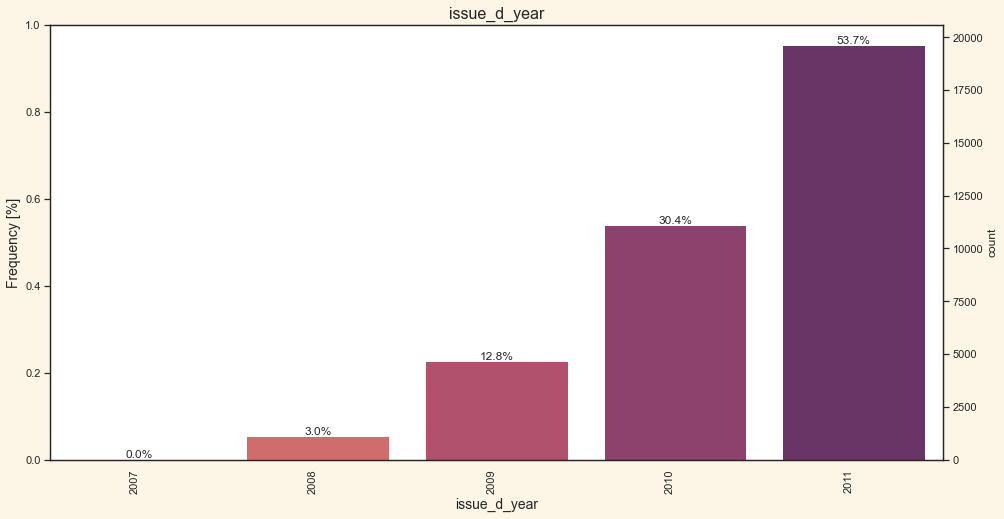

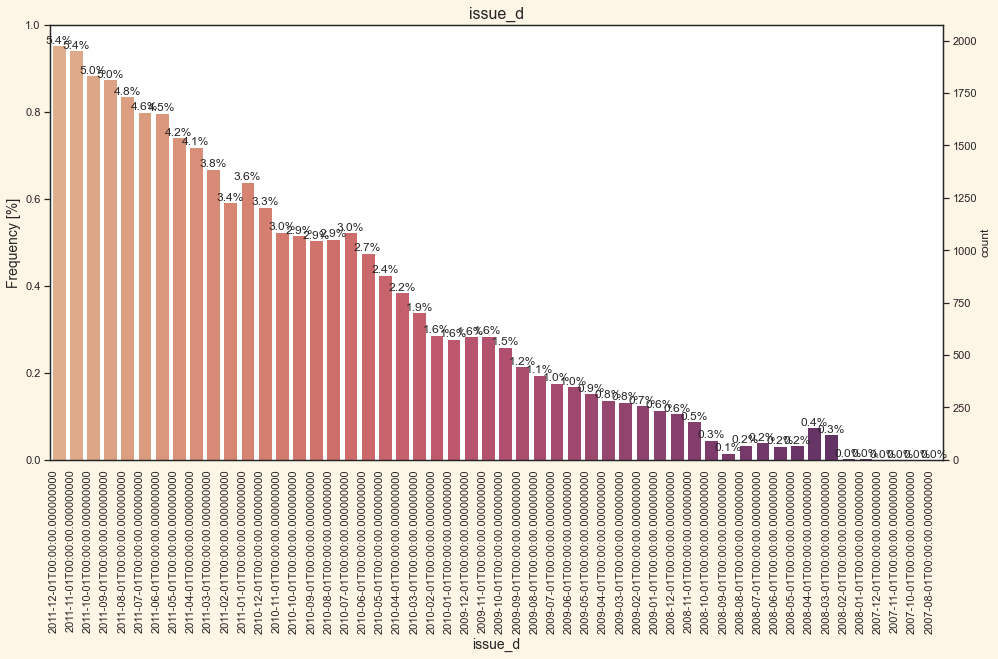

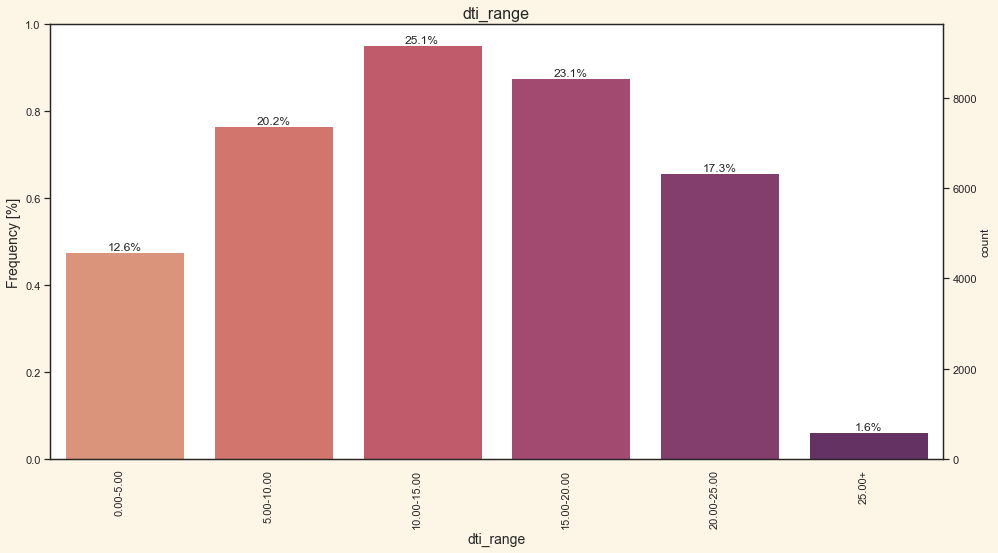

In [140]:
for i in Categorical_variables:
    if i != 'loan_status':
        univariate_analy(i)

### SEGMENTED UNIVARIATE ANALYSIS OF CATEGORICAL VARIABLES

In [141]:
#def segmented univariate function for the categorical functions.
def segUnivariate_cate(col1): 
    plt.figure(figsize=(16,10),facecolor='oldlace')
    # subplot 1
    plt.subplot(2, 2, 1)
    dims = (6,6)
    rot_flag = 0
   
    # sns.set_style("dark")
    f = sns.countplot(x=col1, data=df,hue='loan_status',palette='flare')
    plt.title(col1+' loan_status ',fontsize=14)
    plt.xlabel(col1,fontsize=14)
    f.set_xticklabels(f.get_xticklabels(), rotation=90, ha="right")

     # crosstab percentage table(along rows) between the variable and the defaulted(count/sum*100)
    q=pd.crosstab(df[col1],df['loan_status'])
    #create a column as charged off probabilty
    q['total']=q['Charged Off']+q['Fully Paid']
    q['charged off_probability']=(100*q['Charged Off'])/q['total']
    q=q.reset_index()

    
    # plot the column charged off probabilty
    # subplot 2
    plt.subplot(2, 2, 2)
    g=sns.barplot(x=col1,y='charged off_probability',data=q,palette='flare')
    g.set_ylim(0,100)
    plt.title(col1 + ' vs charged off probabilty Plot',fontsize=14)
    g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
    # for annotations
    for p in g.patches:
        g.annotate("%.2f" % p.get_height()+'%',(p.get_x() + p.get_width() / 2., p.get_height()) ,
                ha='center', va='center', fontsize=11, rotation=90, xytext=(0, 20),
                 textcoords='offset points') 
    return(q)        

### SEGMENTED UNIVARIATE ANALYSIS OF CATEGORICAL VARIABLES

### term

loan_status,term,Charged Off,Fully Paid,total,charged off_probability
0,36,2932,24394,27326,10.73
1,60,2309,6842,9151,25.23


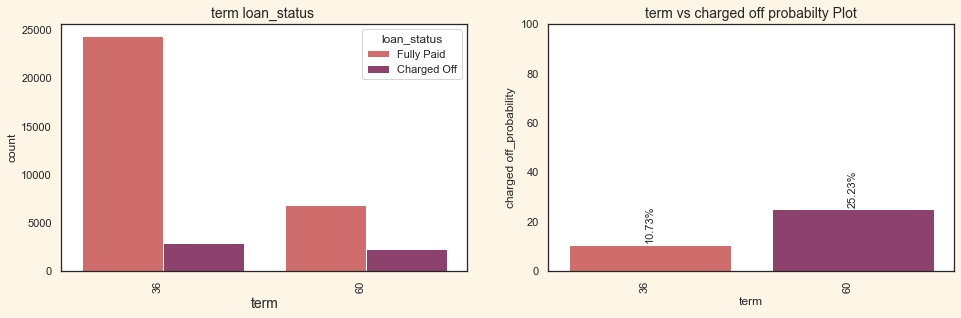

In [142]:
#Segemented univariate on term against loan status
segUnivariate_cate('term')

### Observations :
#### Below plot shows that those who had taken loan to repay in 60 months has more % of number of applicants getting charged off as compared to applicants who had taken loan for 36 months.
#### Around 75% of the total loans are given for duration of 36 month. while just 25% of the loans are those given for 60 months.
#### Among Charged Off loans, percentage of term 60 months is higher.
#### Assumption can be made that higher terms may lead to defaulter

## issue_d_year

loan_status,issue_d_year,Charged Off,Fully Paid,total,charged off_probability
0,2007,2,5,7,28.57
1,2008,172,935,1107,15.54
2,2009,589,4071,4660,12.64
3,2010,1392,9705,11097,12.54
4,2011,3086,16520,19606,15.74


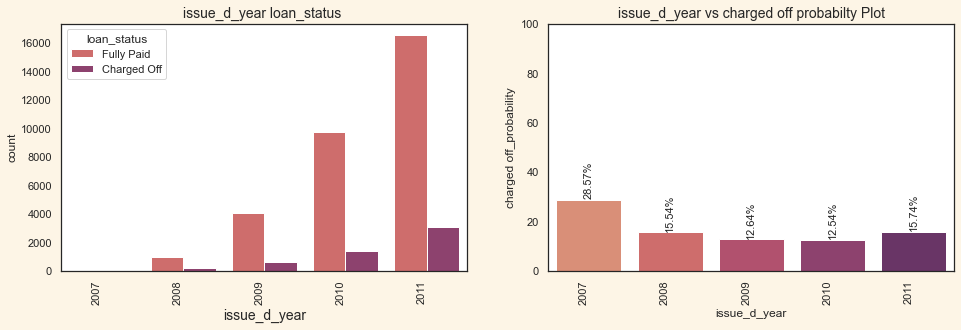

In [143]:
#Segemented univariate on issue year against loan status
segUnivariate_cate('issue_d_year')


loan_status,issue_d_month,Charged Off,Fully Paid,total,charged off_probability
0,1,277,1867,2144,12.92
1,2,241,1849,2090,11.53
2,3,314,2175,2489,12.62
3,4,354,2381,2735,12.94
4,5,440,2366,2806,15.68
5,6,457,2602,3059,14.94
6,7,459,2736,3195,14.37
7,8,445,2818,3263,13.64
8,9,522,2817,3339,15.63
9,10,537,3003,3540,15.17


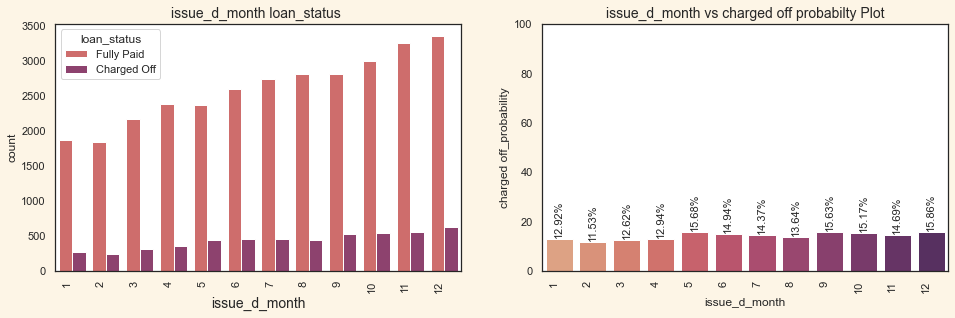

In [144]:
#Segemented univariate on issue year against loan status
segUnivariate_cate('issue_d_month')

- #### Over the years, LC as an organisation has been giving more loans. From Aug,2007 to 2011 the loans issued have risen significantly.
- #### Within a year, the number of loan issued rises over the month from jan to Dec. December is the month of the year were the maximum number of loans are being issued is company is in hurry to reach the target?
- #### the maximum charged off is also increasing as the year and significantly same for months so we cannot predict much out of this 

### purpose

loan_status,purpose,Charged Off,Fully Paid,total,charged off_probability
0,car,152,1272,1424,10.67
1,credit_card,497,4265,4762,10.44
2,debt_consolidation,2613,14636,17249,15.15
3,educational,48,249,297,16.16
4,home_improvement,313,2348,2661,11.76
5,house,57,282,339,16.81
6,major_purchase,205,1835,2040,10.05
7,medical,100,540,640,15.62
8,moving,80,457,537,14.90
9,other,578,2999,3577,16.16


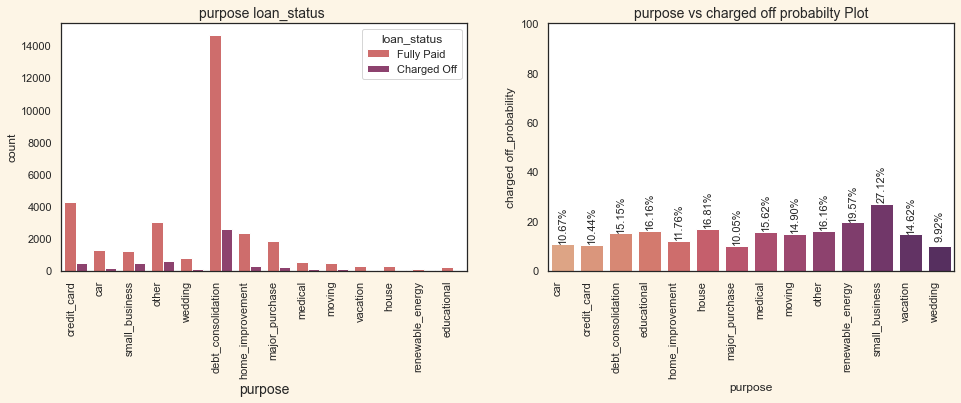

In [145]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan
segUnivariate_cate('purpose')

### Observation : 
#### Above plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill. Number of chraged off count also high too for these loans so the probability is high as a deafulter.
- #### small Business applicants have high chances of getting charged off.
- #### Small Business are at high risk

### home_ownership

loan_status,home_ownership,Charged Off,Fully Paid,total,charged off_probability
0,MORTGAGE,2176,13906,16082,13.53
1,OTHER,18,78,96,18.75
2,OWN,385,2296,2681,14.36
3,RENT,2662,14956,17618,15.11


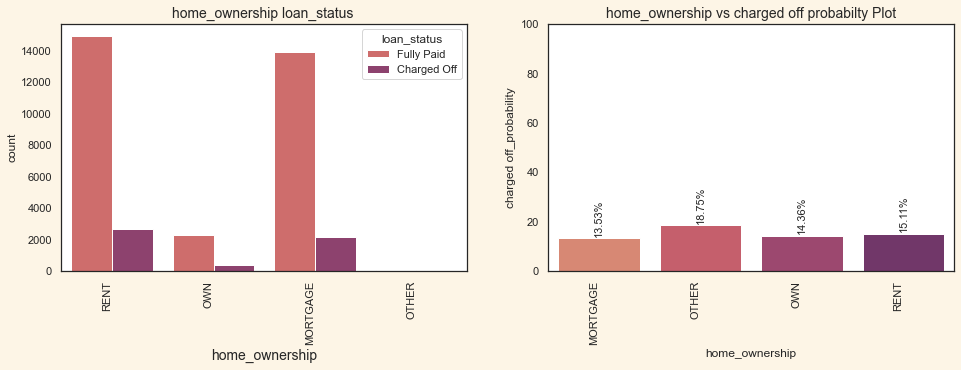

In [146]:
# Seg Univariate Analysis - Unordered Categorical Variables - Home Ownership
segUnivariate_cate('home_ownership')

#### Observations :
#### Above plot shows that most of them living in rented home or mortgazed their home.Applicant numbers are high from these categories so charged off is high too. 

### grade

loan_status,grade,Charged Off,Fully Paid,total,charged off_probability
0,A,551,8901,9452,5.83
1,B,1318,9745,11063,11.91
2,C,1249,6160,7409,16.86
3,D,1046,3765,4811,21.74
4,E,679,1855,2534,26.80
5,F,300,622,922,32.54
6,G,98,188,286,34.27


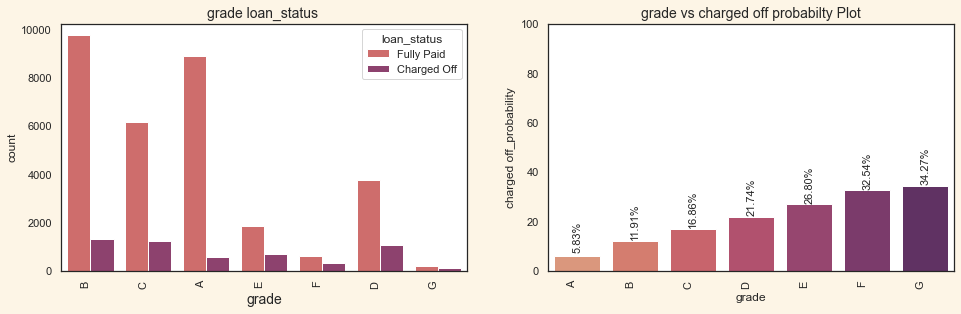

In [147]:
# Seg Univariate Analysis - Categorical Variables - grade
segUnivariate_cate('grade')

### Observations:
#### Above plot shows grades B,C and D has the highest count while higest loan are given to grade B. 

### emp_length

loan_status,emp_length,Charged Off,Fully Paid,total,charged off_probability
0,0,609,3705,4314,14.12
1,1,441,2612,3053,14.44
2,2,550,3612,4162,13.21
3,3,545,3371,3916,13.92
4,4,444,2827,3271,13.57
5,5,452,2683,3135,14.42
6,6,299,1820,2119,14.11
7,7,257,1418,1675,15.34
8,8,200,1194,1394,14.35
9,9,155,1044,1199,12.93


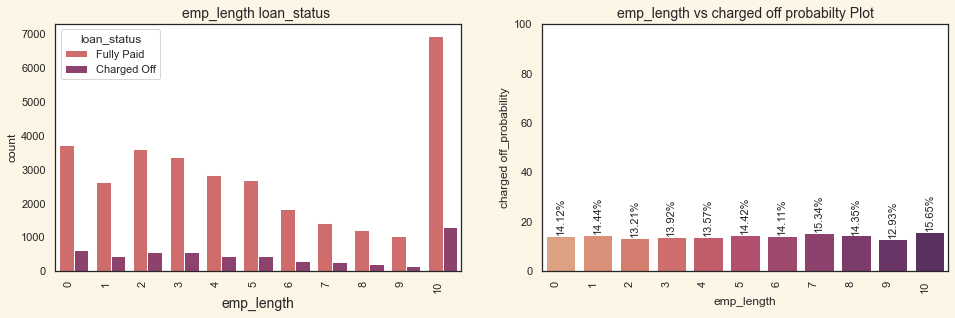

In [148]:
# Seg Univariate Analysis - Categorical Variables - emp_length
segUnivariate_cate('emp_length')

### Observations :
#### People with  10 year or more experience are taking loans more frequently and no significant difference in default rates among the employment lengths

### verification status

loan_status,verification_status,Charged Off,Fully Paid,total,charged off_probability
0,Not Verified,1921,13582,15503,12.39
1,Source Verified,1385,7992,9377,14.77
2,Verified,1935,9662,11597,16.69


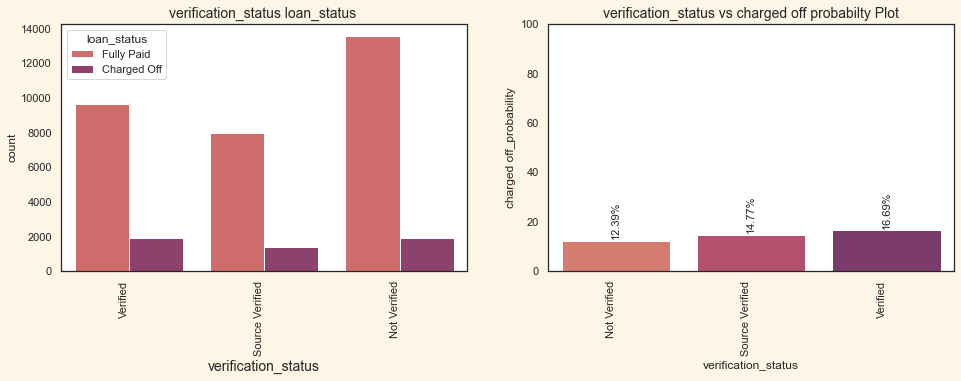

In [149]:
#Verification univariate analysis
segUnivariate_cate('verification_status')

### Observations :
- #### Overall, it appears that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans.

#### loan_amnt_range

loan_status,loan_amnt_range,Charged Off,Fully Paid,total,charged off_probability
0,0-7000,1727,11686,13413,12.88
1,7000-14000,1685,11007,12692,13.28
2,14000-21000,1084,5625,6709,16.16
3,21000-28000,498,2122,2620,19.01
4,28000 +,247,796,1043,23.68


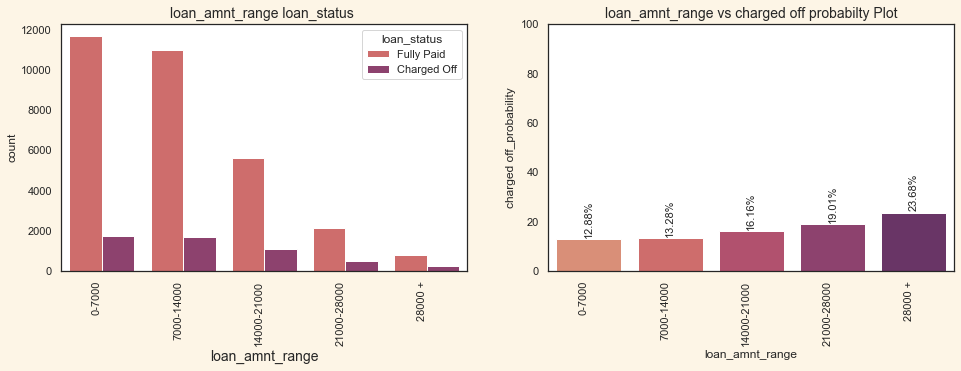

In [150]:
#Univariate and Segmented univariate analysis for Loan amount 
segUnivariate_cate('loan_amnt_range')

#### annual_inc_range

loan_status,annual_inc_range,Charged Off,Fully Paid,total,charged off_probability
0,0-25000,410,1789,2199,18.64
1,25000-50000,1982,10180,12162,16.30
2,50000-75000,1610,9660,11270,14.29
3,75000-100000,708,5173,5881,12.04
4,100000 and above,531,4434,4965,10.69


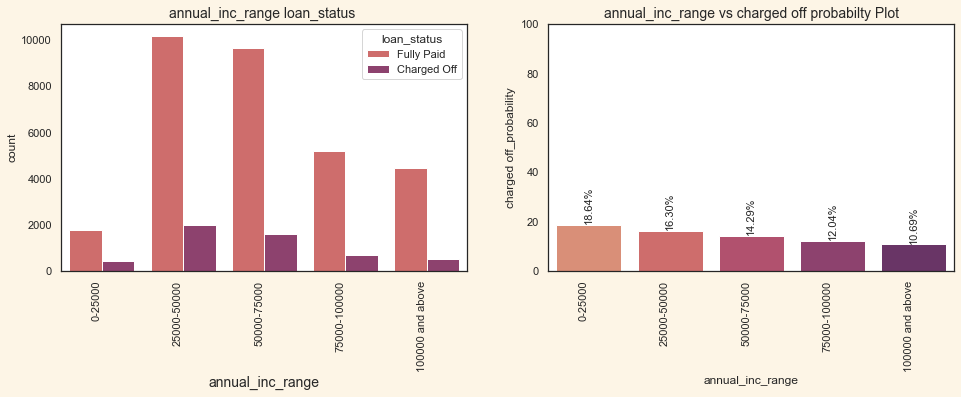

In [151]:
#Univariate and Segmented univariate analysis for Annual inc range
segUnivariate_cate('annual_inc_range')

#### int_rate_range

loan_status,int_rate_range,Charged Off,Fully Paid,total,charged off_probability
0,0-10,733,10730,11463,6.39
1,10-12,979,6867,7846,12.48
2,12-16,2034,9944,11978,16.98
3,16-20,1210,3248,4458,27.14
4,20+,217,368,585,37.09


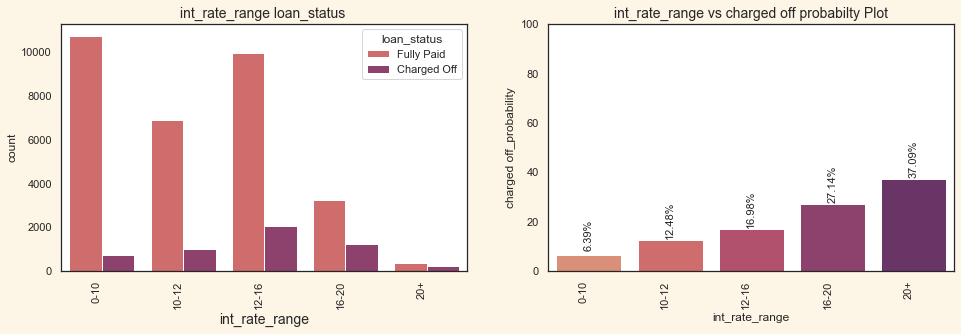

In [152]:
#Univariate and Segmented univariate analysis for interest rate
segUnivariate_cate('int_rate_range')

#### dti_range

loan_status,dti_range,Charged Off,Fully Paid,total,charged off_probability
0,0.00-5.00,567,4020,4587,12.36
1,5.00-10.00,928,6442,7370,12.59
2,10.00-15.00,1311,7854,9165,14.30
3,15.00-20.00,1307,7128,8435,15.49
4,20.00-25.00,1049,5276,6325,16.58
5,25.00+,79,516,595,13.28


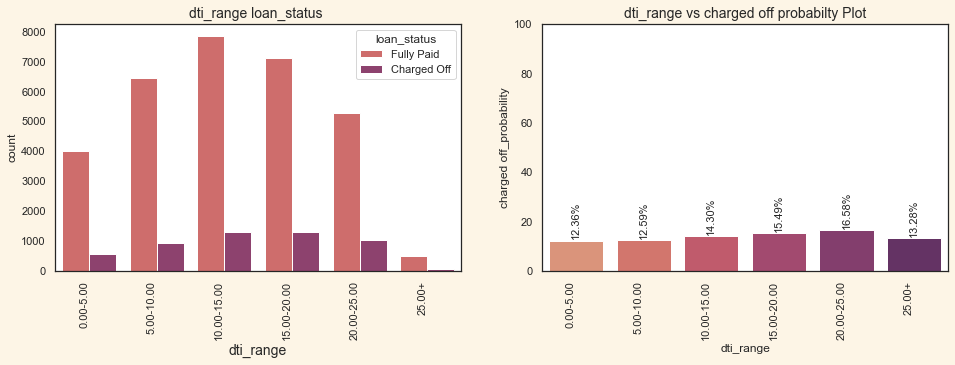

In [153]:
#Univariate and Segmented univariate analysis for dti range
segUnivariate_cate('dti_range')

#### addr_state

loan_status,addr_state,Charged Off,Fully Paid,total,charged off_probability
0,AK,14,60,74,18.92
1,AL,51,358,409,12.47
2,AR,26,198,224,11.61
3,AZ,112,672,784,14.29
4,CA,1042,5578,6620,15.74
...,...,...,...,...,...
44,VT,6,45,51,11.76
45,WA,116,637,753,15.41
46,WI,59,349,408,14.46
47,WV,21,143,164,12.80


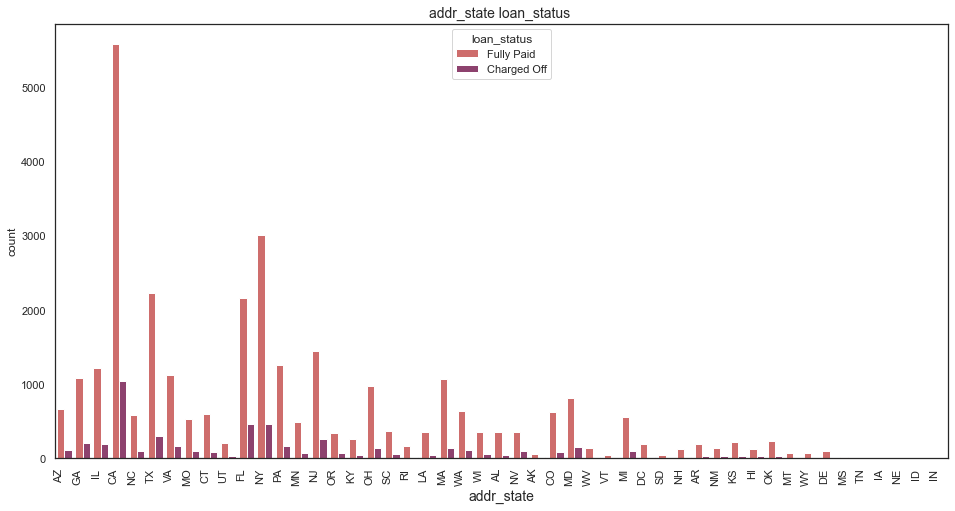

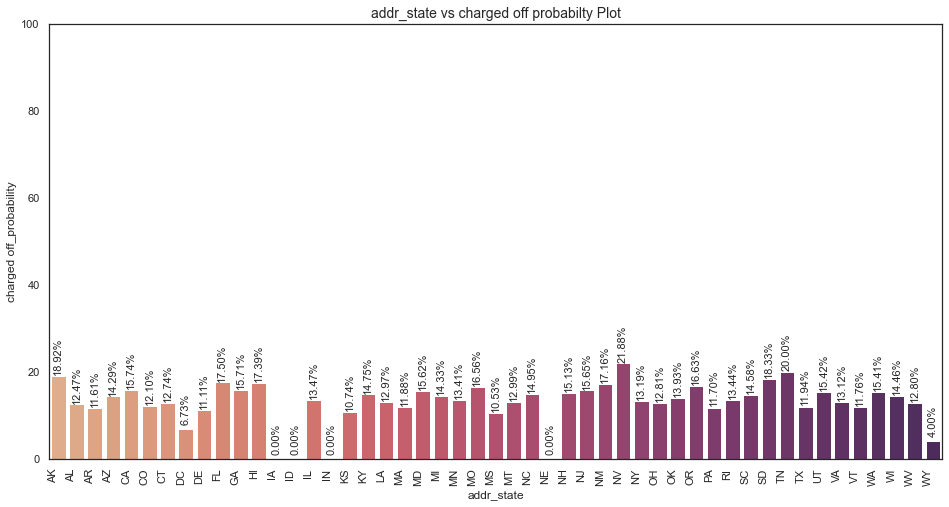

In [154]:
#Univariate and Segmented univariate analysis for address state
fig,ax=plt.subplots(figsize=(16,8))
f = sns.countplot(x='addr_state', data=df,hue='loan_status',palette='flare')
plt.title('addr_state'+' loan_status ',fontsize=14)
plt.xlabel('addr_state',fontsize=14)
f.set_xticklabels(f.get_xticklabels(), rotation=90, ha="right")

 # crosstab percentage table(along rows) between the variable and the defaulted(count/sum*100)
q=pd.crosstab(df['addr_state'],df['loan_status'])
#create a column as charged off probabilty
q['total']=q['Charged Off']+q['Fully Paid']
q['charged off_probability']=(100*q['Charged Off'])/q['total']
q=q.reset_index()

    
# plot the column charged off probabilty
  
fig,ax=plt.subplots(figsize=(16,8))
g=sns.barplot(x='addr_state',y='charged off_probability',data=q,palette='flare')
g.set_ylim(0,100)
plt.title('addr_state' + ' vs charged off probabilty Plot',fontsize=14)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
 # for annotations
for p in g.patches:
    g.annotate("%.2f" % p.get_height()+'%',(p.get_x() + p.get_width() / 2., p.get_height()) ,
                ha='center', va='center', fontsize=11, rotation=90, xytext=(0, 20),
                 textcoords='offset points') 
(q)    

#### Observations:
#### States with higher Charge Off rates have very low number of loans. The percentage is therefore NOT significant and 
#### should be ignored. Overall, this variable does not affect propensity to default.

#### pub_bankruptcies

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,total,charged off_probability
0,0.00,4905,30041,34946,14.04
1,1.00,334,1192,1526,21.89
2,2.00,2,3,5,40.00


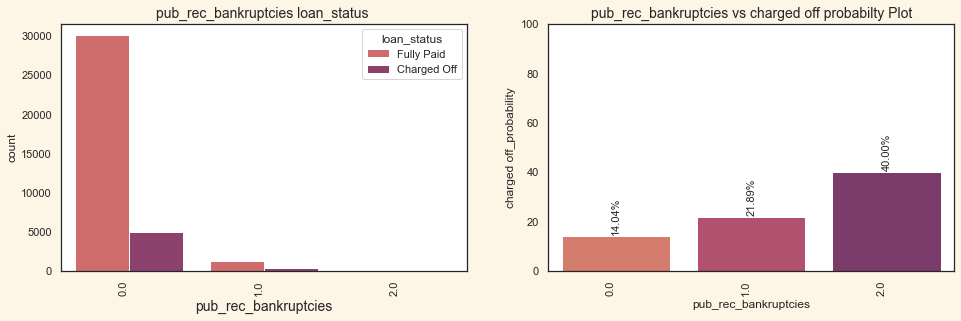

In [155]:
#Univariate and Segmented univariate analysis for Public Bankruptcy record
segUnivariate_cate('pub_rec_bankruptcies')

#### Observations:
#### Person having 1 or more record of bankruptcy has likely to default the loan .

#### subgrade

loan_status,sub_grade,Charged Off,Fully Paid,total,charged off_probability
0,A1,24,1010,1034,2.32
1,A2,67,1336,1403,4.78
2,A3,87,1604,1691,5.14
3,A4,167,2576,2743,6.09
4,A5,206,2375,2581,7.98
...,...,...,...,...,...
30,G1,30,60,90,33.33
31,G2,27,47,74,36.49
32,G3,19,25,44,43.18
33,G4,12,39,51,23.53


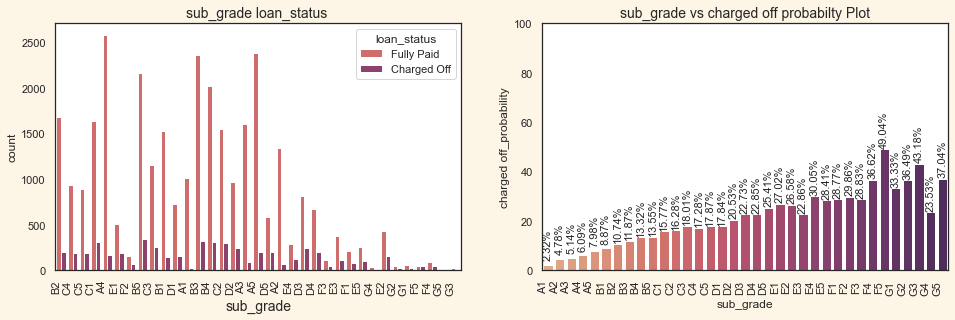

In [156]:
#Univariate and Segmented univariate analysis for Public Bankruptcy record
segUnivariate_cate('sub_grade')

## Bivariate Analysis 

In [157]:
#define function for bivariate boxplot and bivariate barplot
def boxplot_bivariate(data,col1,col2,col3):
    fig,ax=plt.subplots(figsize=(16,8),facecolor='oldlace')
    cf = sns.boxplot(x=col1, y=col2, data=data,hue=col3, palette='flare')
    
    cf.set_title(col1 + " by " + col2, fontsize=20)
def bivariate_bar(data,col1,col2,col3):
    fig,ax=plt.subplots(figsize=(16,8),facecolor='oldlace')
    cf=sns.barplot(x=col1,y=col2,hue=col3,data=data,palette='flare')
    cf.set_xticklabels(cf.get_xticklabels(),rotation=45)
    cf.set_title(col1+ ' wtr '+col2+ ' for '+col3)
 

#### Relationship between purpose','loan_amnt'and 'loan_status'

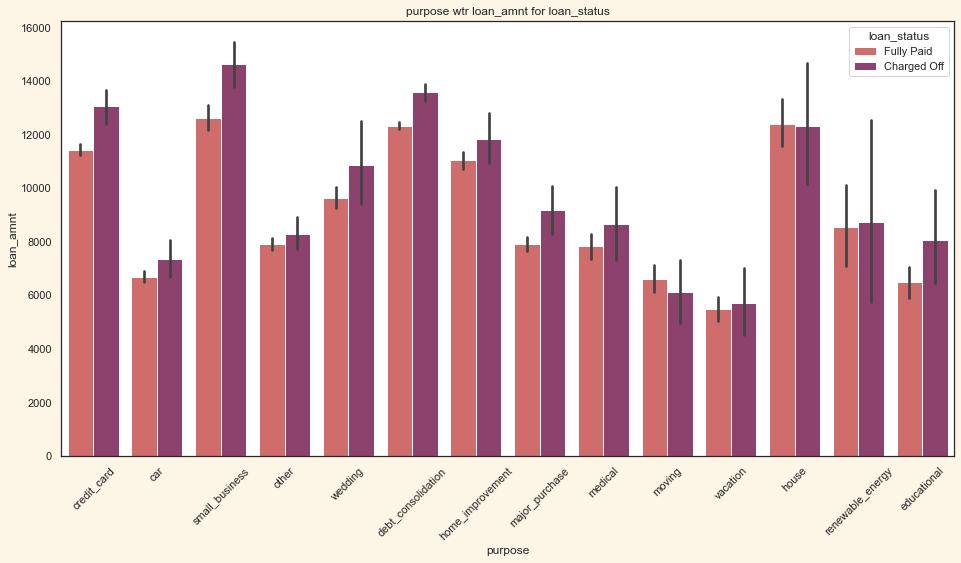

In [158]:
bivariate_bar(df,'purpose','loan_amnt','loan_status')

#### Observations:
#### small Business applicants have high chances of getting charged off.

#### Relationship between purpose','int_rate_range' and 'loan_status'

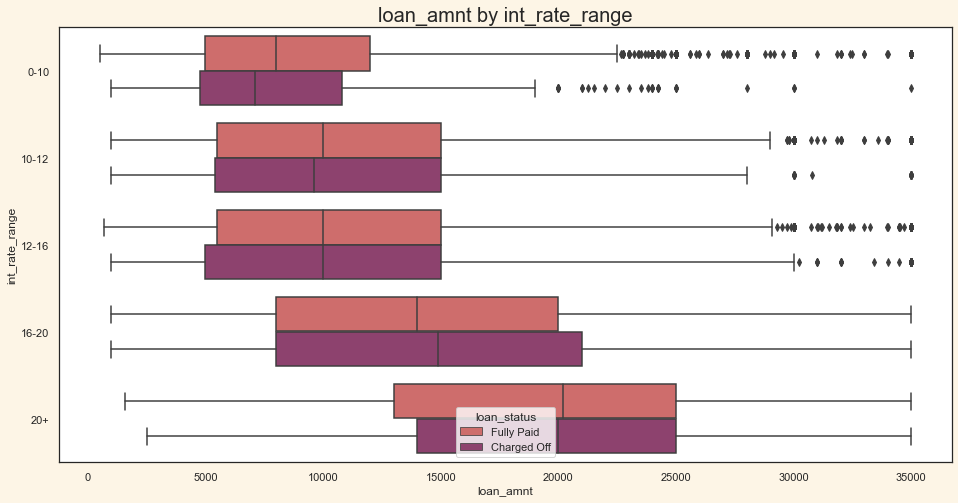

In [159]:
boxplot_bivariate(df,'loan_amnt','int_rate_range','loan_status')

### Observations:
- #### interest rate less than 10% has very less chances of charged off. Interest rates are starting from minimum 5%.
- #### interest rate more than 16% to 20% has good chnaces of charged off as compared to other category interest rates.
- #### Charged off proportion is increasing with higher interest rates.
- #### higher the interest rate we are more likely to get default.

#### Relationship between int_rate','grade',loan_status)

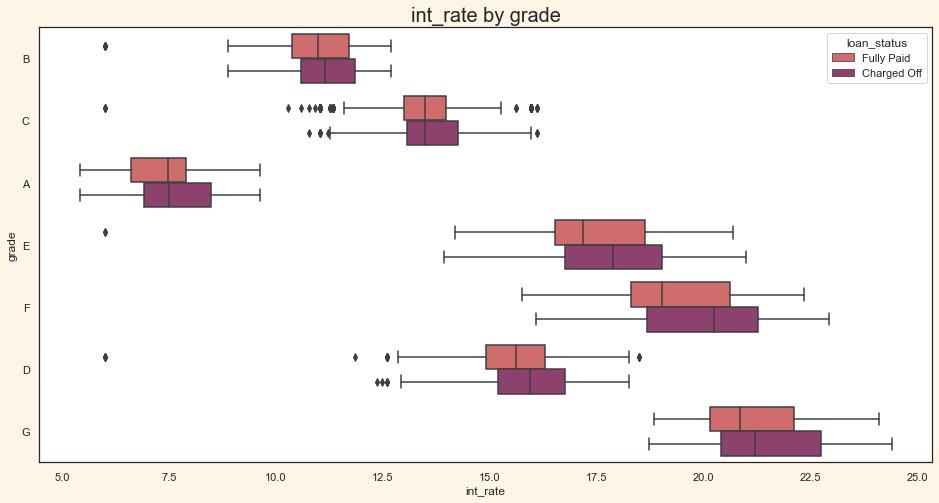

In [160]:
boxplot_bivariate(df,'int_rate','grade','loan_status')

### Observations:
- #### Grade "F" and "G" have very high chances of charged off so these are risky factor to give loan.
- #### Chances of charged off is increasing with grade moving from "A" towards "G"
- #### Grade "A" has very less chances of charged off.

#### Relationship between'annual_inc','grade','loan_status'

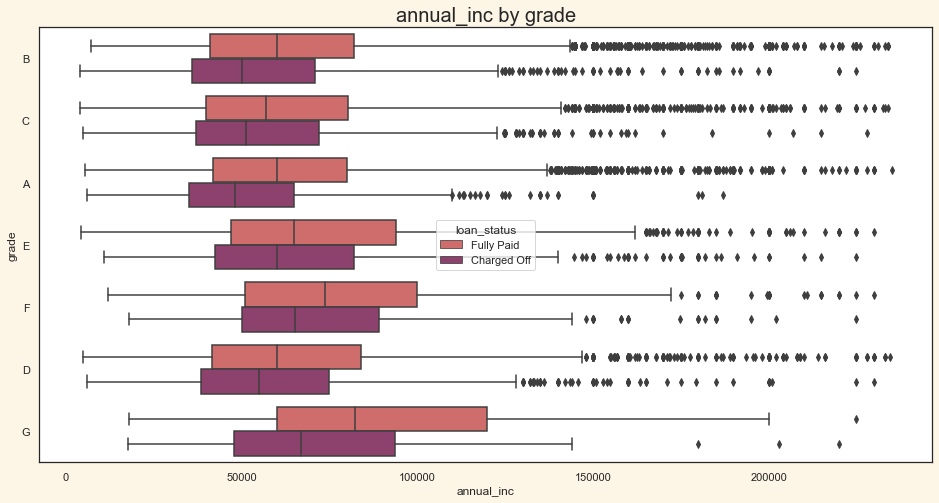

In [161]:
boxplot_bivariate(df,'annual_inc','grade','loan_status')

### Observations:
#### From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones which has high

#### Relationship between 'emp_length','annual_inc','loan_status'

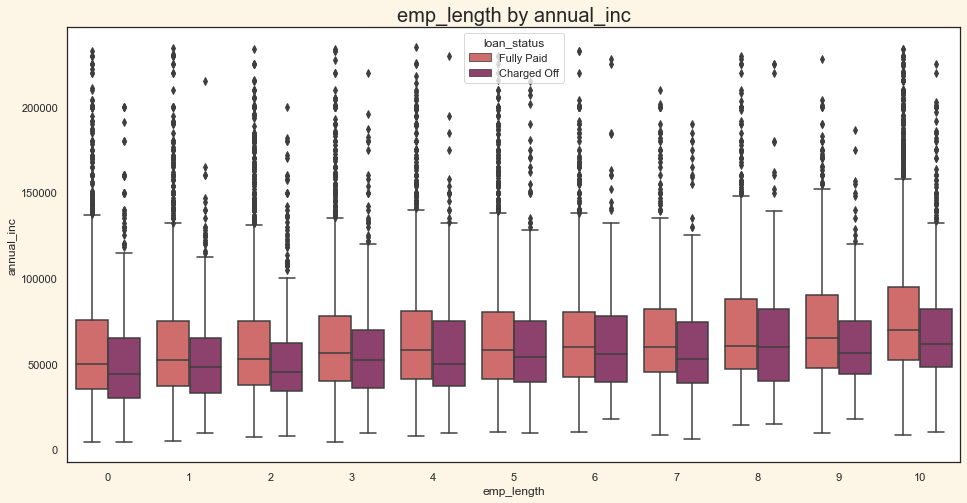

In [162]:
boxplot_bivariate(df,'emp_length','annual_inc','loan_status')

### Observations:
#### Most of the applicants with various employment length have more or less same chnaces of getting charged off.

#### Relationship between 'term','int_rate','loan_status'

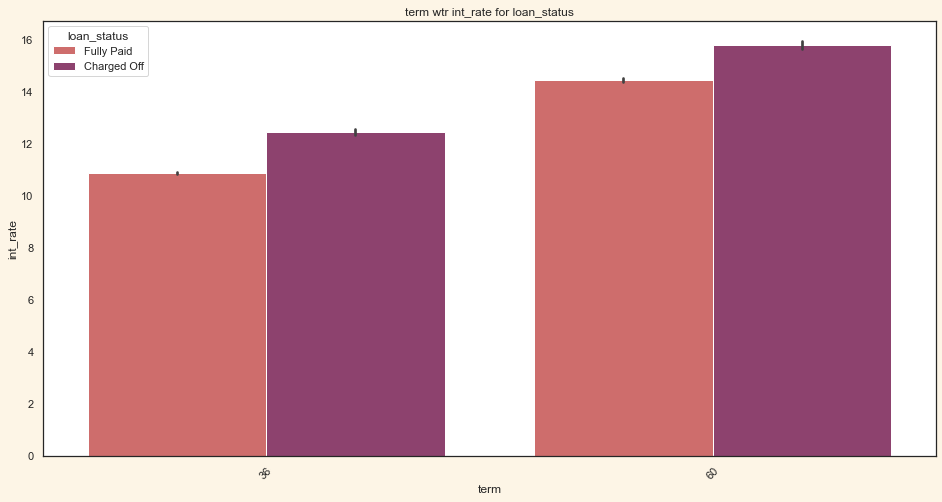

In [163]:
bivariate_bar(df,'term','int_rate','loan_status')

### Observations:
#### It is clear that average interest rate is higher for 60 months loan term.
#### Most of the loans issued for longer term had higher intrest rates for repayement that could be a risky factor to consider.

#### Relationship between 'dti','int_rate','loan_status'

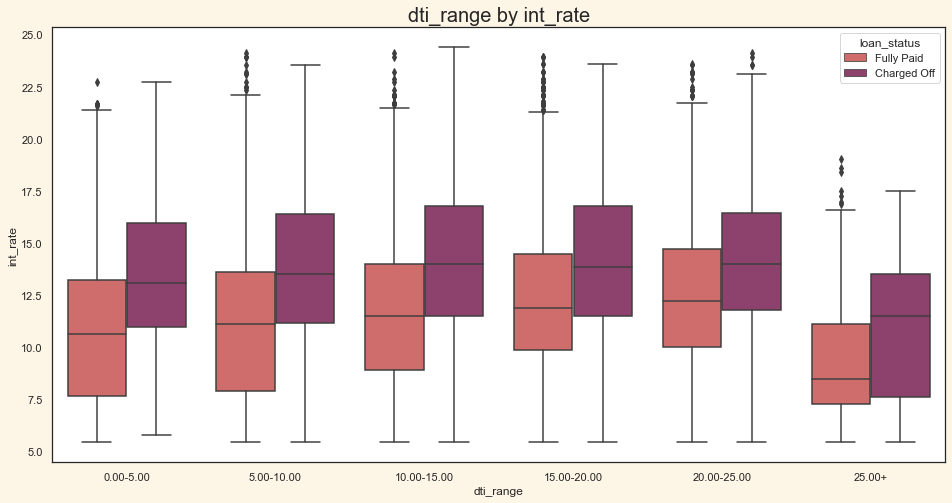

In [164]:
boxplot_bivariate(df,'dti_range','int_rate','loan_status')

### Observations:
#### The plot shows if you have less DTI you will have low interest rate while high DPI shows high interest rate.
#### Borrowers with high DTI has bit more probability to default it is because the interest rate is high

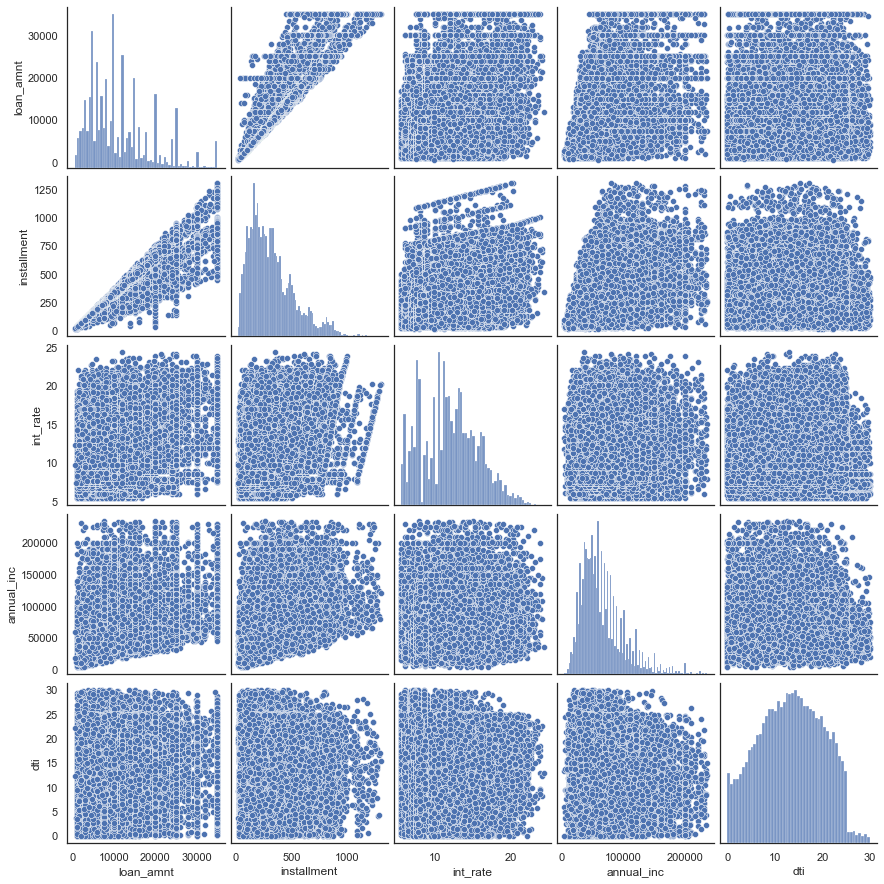

In [165]:
sns.pairplot((df.loc[:,('loan_amnt','installment','int_rate','annual_inc','dti')]))

## MULTIVARIATE ANALYSIS

In [166]:
cor=df.corr()
cor

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,pub_rec,pub_rec_bankruptcies,issue_d_month,issue_d_year
loan_amnt,1.00,0.30,0.93,0.15,0.41,0.07,-0.05,-0.03,0.05,0.11
int_rate,0.30,1.00,0.27,-0.00,0.06,0.11,0.10,0.08,0.02,0.02
installment,0.93,0.27,1.00,0.12,0.41,0.06,-0.04,-0.03,0.03,0.06
emp_length,0.15,-0.00,0.12,1.00,0.17,0.05,0.06,0.06,0.02,0.11
annual_inc,0.41,0.06,0.41,0.17,1.00,-0.11,-0.01,-0.01,0.01,0.04
dti,0.07,0.11,0.06,0.05,-0.11,1.00,-0.01,0.01,0.01,0.08
pub_rec,-0.05,0.10,-0.04,0.06,-0.01,-0.01,1.00,0.84,-0.02,-0.02
pub_rec_bankruptcies,-0.03,0.08,-0.03,0.06,-0.01,0.01,0.84,1.00,-0.02,-0.00
issue_d_month,0.05,0.02,0.03,0.02,0.01,0.01,-0.02,-0.02,1.00,-0.07
issue_d_year,0.11,0.02,0.06,0.11,0.04,0.08,-0.02,-0.00,-0.07,1.00


<function matplotlib.pyplot.close(fig=None)>

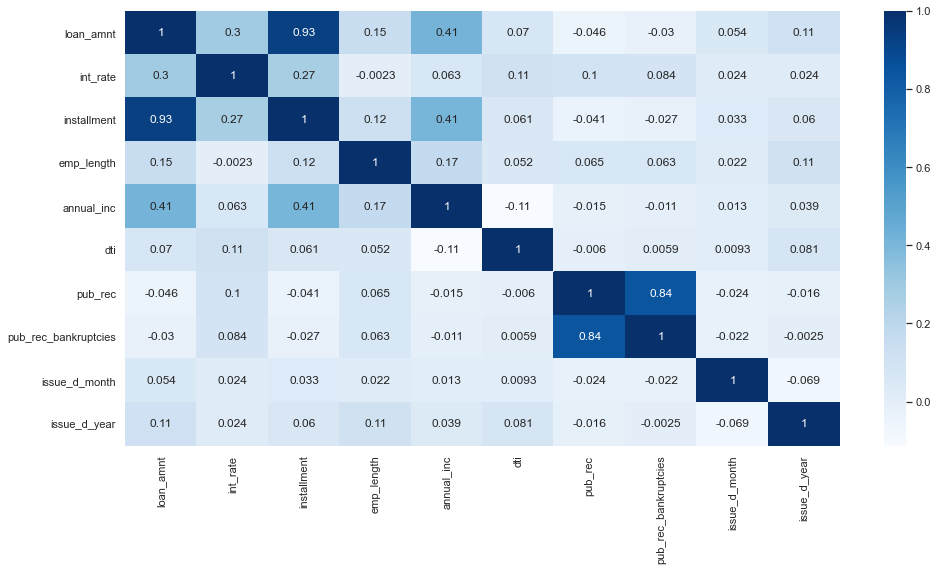

In [167]:
fig,ax=plt.subplots(figsize=(16,8))
sns.heatmap(cor, annot=True,cmap='Blues')
plt.close

In [168]:
#finding the variables which are correlated to each other.(pearson r is >=0.5 or <-0.5)
for i in cor.columns:
    for j in cor.index:
        if i!=j:
            if cor.loc[i,j]>0.5 or cor.loc[i,j]<-0.5:
                print(i,j,cor.loc[i,j])
    

loan_amnt installment 0.9306156369274345
installment loan_amnt 0.9306156369274345
pub_rec pub_rec_bankruptcies 0.842917661729333
pub_rec_bankruptcies pub_rec 0.842917661729333


#### Observations:
loan_amnt and installment are strongly correlated
pub derogatory record  and public bankruptcies record are also strongly correlated 


## FEATURE SELECTION:

We utilized 'KBest for classification' for  feature selection.


Our DATASET has

   Target variable(output)-  categorical variable
   
   Independant variables(Input)-
           
         Categorical
         
         Numerical

For KBest feature selection we will utilize

        Categorical-   chi2 test
        
        Numerical-     ANNOVA(f_classif)  
   
   
   


In [169]:
#import libraries for feature selection from sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.feature_selection import chi2

### Feature selection for Categorical input variables-Chi-Squared Feature Selection

In [170]:
# split into input (X) and output (y) variables
X= df.drop('loan_status',axis=1)# drop 'loan_status' to form input X
X=X.drop(Continous_variables,axis=1)#drop the 'Numerical variables'
y = df['loan_status']
# format all fields as string
X = X.astype(str)
X.head()
predictors=X.columns#(input variable names)

In [171]:
#lets check the data
X.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,purpose,addr_state,pub_rec,pub_rec_bankruptcies,issue_d_month,issue_d_year,int_rate_range,loan_amnt_range,dti_range,annual_inc_range
0,36,B,B2,10,RENT,Verified,2011-12-01,credit_card,AZ,0,0.0,12,2011,10-12,0-7000,25.00+,0-25000
1,60,C,C4,0,RENT,Source Verified,2011-12-01,car,GA,0,0.0,12,2011,12-16,0-7000,0.00-5.00,25000-50000
2,36,C,C5,10,RENT,Not Verified,2011-12-01,small_business,IL,0,0.0,12,2011,12-16,0-7000,5.00-10.00,0-25000
3,36,C,C1,10,RENT,Source Verified,2011-12-01,other,CA,0,0.0,12,2011,12-16,7000-14000,15.00-20.00,25000-50000
5,36,A,A4,3,RENT,Source Verified,2011-12-01,wedding,AZ,0,0.0,12,2011,0-10,0-7000,10.00-15.00,25000-50000


In [172]:
#prepare input variables by using OrdinalEncoder-to encode each variable to integers
oe=OrdinalEncoder()
oe.fit(X)
X=oe.transform(X)

In [173]:
#prepare output(target variable) bu using LabelEncoder-to encode each variable to integers in binary setting.
le=LabelEncoder()
le.fit(y)
y=le.transform(y)

In [174]:
# Perform feature selection by using score_func=chi2
selector = SelectKBest(score_func=chi2, k=5)
selector.fit(X, y)

SelectKBest(k=5, score_func=<function chi2 at 0x00000220076F9940>)

In [175]:
# get the columns with k best features
mask = selector.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, predictors):
    if bool:
        new_features.append(feature)

new_features

['term', 'grade', 'sub_grade', 'purpose', 'int_rate_range']

(True, 877.8843001509553)
(True, 1855.7394535997992)
(True, 7349.5164278244665)
(False, 2.521262436379704)
(False, 21.83064647306358)
(False, 82.56464016776248)
(False, 146.75014313241792)
(True, 192.13846296565208)
(False, 148.173243066731)
(False, 91.65507703171747)
(False, 72.81719288446722)
(False, 1.1121360657437627)
(False, 6.843391826525647)
(True, 1468.2100821243048)
(False, 1.2411372358338473)
(False, 0.5509637423637515)
(False, 7.834284864199841)


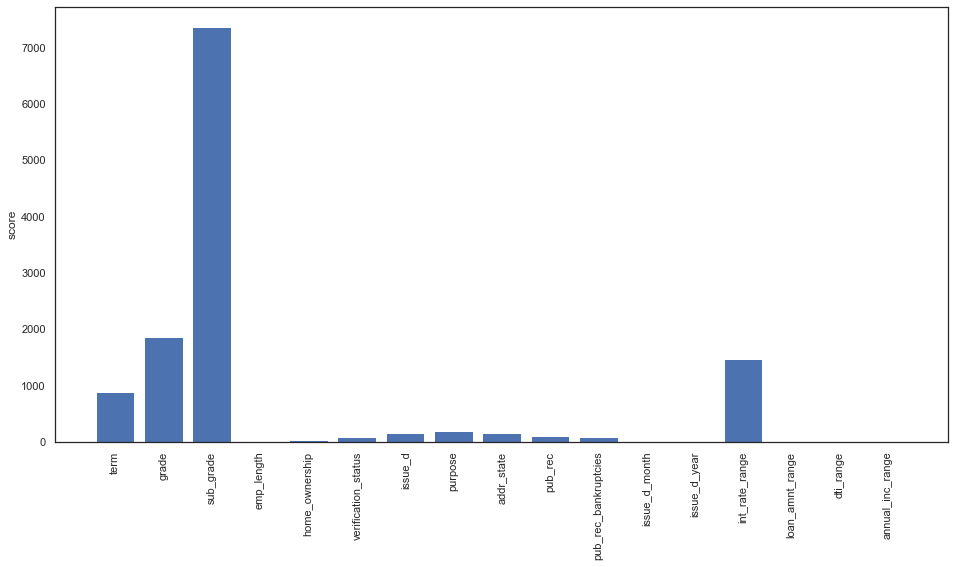

In [176]:
for i in range(len(selector.scores_)):
    
    print((mask[i], selector.scores_[i]))
# plot the scores
fig,ax=plt.subplots(figsize=(16,8))
plt.bar([i for i in range(len(selector.scores_))], selector.scores_)
plt.xticks(range(len(predictors)), predictors, rotation='vertical',)
plt.ylabel('score')
plt.show()


### Feature selection for Continuous/numerical input variables-ANOVA-f_classif Feature Selection

In [177]:
# ANOVA feature selection for numeric input and categorical output

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset with continous input variables
X2=df.drop(Categorical_variables,axis=1)
predictors2=X2.columns# continous variable names
X2=X2.values

# define feature selection(TOP3)

selector2 = SelectKBest(score_func=f_classif, k=3)
# apply feature selection
selector2.fit(X2, y)


SelectKBest(k=3)

In [178]:
# get the columns with k best features
mask2 = selector2.get_support() #list of booleans
new_features2 = [] # The list of your K best features
for bool, feature in zip(mask2, predictors2):
    if bool:
        new_features2.append(feature)

new_features2

['loan_amnt', 'int_rate', 'annual_inc']

(True, 144.71502402263965)
(True, 1778.0185742345127)
(False, 29.294925058449756)
(True, 142.31467343350917)
(False, 63.08248044187527)


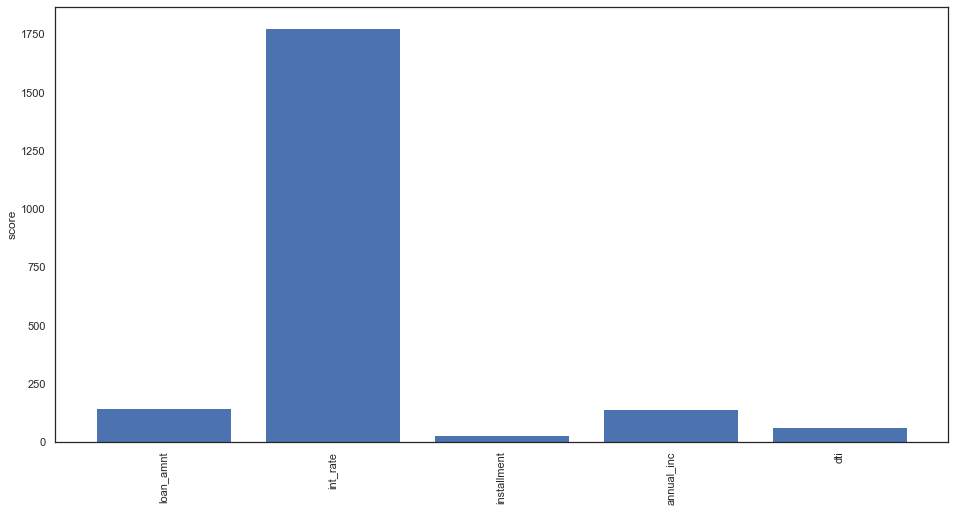

In [179]:
for i in range(len(selector2.scores_)):
    print((mask2[i], selector2.scores_[i]))
# plot the scores
fig,ax=plt.subplots(figsize=(16,8))
plt.bar([i for i in range(len(selector2.scores_))], selector2.scores_)
plt.xticks(range(len(predictors2)), predictors2, rotation='vertical',)
plt.ylabel('score')
plt.show()

---

## CONCLUSIONS AND RECOMMENDATIONS:
### Based on the Analysis done, we conclude the below mentioned points:
#### 1. Top predictors for charged Off loans are term, grade, subgrade, purpose, int-rate-range, annual income ,loan amount and interest rate.
#### 2.Other factors which may also have some impact are, verification status, pub_bankruptcies, addr_state and home ownership.
#### 3.Higher loan_amounts, term(60 months) and  higher int-rate are associated with higher charged off probability
#### 4.Lower annual income, lower grade(like F,G), small businesses and renewable energy and home and education loans are again  at higher risk.
#### 5.Verification status as not verified, pub_bankruptcies>=2 , home ownership-mortage and rent are also at increased risk for    defaulting.
### Suggestions to Lending Club:
#### 1.Lending club should reduce the high interest loans for 60 months tenure, they are prone to loan default.
#### 2.Lending club should gather more information from borrower before granting loan to lower category Grade from G to           A(preferably higher income)
#### Small Business Applicants have high chances of getting charged off. Lending club should reduce issuing loan to them.
#### (especially higher loan amounts)
#### Lower annual income applicants should be avoided for big loan amounts with higher interest Rates